In [1]:
##===================
# Installing required packages:
# - pandas for dataframes 
# - numpy for numerical computing
# - matplotlib for making graphs
# - seaborn for more complex graphs, complementary to matplotlib
##===================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##===================
#STEP 1: COLLECT DATA
##===================

daily_activity = pd.read_csv(r"C:\Users\Savvas\Documents\Data_Analytics\DataAnaytics_Google\CaseStudy2\Data\dailyActivity_merged.csv")
daily_calories = pd.read_csv(r"C:\Users\Savvas\Documents\Data_Analytics\DataAnaytics_Google\CaseStudy2\Data\dailyCalories_merged.csv")
daily_steps = pd.read_csv(r"C:\Users\Savvas\Documents\Data_Analytics\DataAnaytics_Google\CaseStudy2\Data\dailySteps_merged.csv")
hourly_calories = pd.read_csv(r"C:\Users\Savvas\Documents\Data_Analytics\DataAnaytics_Google\CaseStudy2\Data\hourlyCalories_merged.csv")
hourly_intensities = pd.read_csv(r"C:\Users\Savvas\Documents\Data_Analytics\DataAnaytics_Google\CaseStudy2\Data\hourlyIntensities_merged.csv")
hourly_steps = pd.read_csv(r"C:\Users\Savvas\Documents\Data_Analytics\DataAnaytics_Google\CaseStudy2\Data\hourlySteps_merged.csv")
min_calories_n = pd.read_csv(r"C:\Users\Savvas\Documents\Data_Analytics\DataAnaytics_Google\CaseStudy2\Data\minuteCaloriesNarrow_merged.csv")
min_steps_n = pd.read_csv(r"C:\Users\Savvas\Documents\Data_Analytics\DataAnaytics_Google\CaseStudy2\Data\minuteStepsNarrow_merged.csv")
sec_heartrate = pd.read_csv(r"C:\Users\Savvas\Documents\Data_Analytics\DataAnaytics_Google\CaseStudy2\Data\heartrate_seconds_merged.csv")
weight = pd.read_csv(r"C:\Users\Savvas\Documents\Data_Analytics\DataAnaytics_Google\CaseStudy2\Data\weightLogInfo_merged.csv")



In [15]:
#####
#Inspection of datasets
#example is for sec_heartrate, but can be anyone of the dataframes created 
#####
dataset = sec_heartrate
print ("Data Preview: \n", dataset.head())# Top 10 lines of the df
#list(dataset)  # Columns of the df
print ("----")
print (" ")

#len(dataset)   # No of rows
print ("Dimensions of data (rows,columns): \n", dataset.shape)  # Dimensions of df
print ("----")
print (" ")

print ("Column datatypes: \n", dataset.dtypes) # Datatype of each column
print ("----")

print (" ")
print ("Class of object in each column *10th line")
for i in range (dataset.shape[1]):
    print (dataset.columns[i], 'is' ,type(dataset.iloc[:,i][10])) #returns the type of object in each column
                                               #type of the 14th line for each column
print ("----")
print (" ")
print ("Null Values per Column: \n", dataset.isnull().sum())
 # shows how many null values are in each colunm
print ("----")
print (" ")
print ('Unique Values Per Column:\n',dataset.nunique())
 # shows no of unique values for a specific column:
print ("----")
index = 0 #index of column for which unique values will be counted 
print ('No of entries for unique values in column',dataset.columns[index],':\n',(dataset.iloc[:,index]).value_counts())

Data Preview: 
            Id              DateTime  Value
0  2022484408  4/12/2016 7:21:00 AM     97
1  2022484408  4/12/2016 7:21:05 AM    102
2  2022484408  4/12/2016 7:21:10 AM    105
3  2022484408  4/12/2016 7:21:20 AM    103
4  2022484408  4/12/2016 7:21:25 AM    101
----
 
Dimensions of data (rows,columns): 
 (2483658, 3)
----
 
Column datatypes: 
 Id           int64
DateTime    object
Value        int64
dtype: object
----
 
Class of object in each column *10th line
Id is <class 'numpy.int64'>
DateTime is <class 'str'>
Value is <class 'numpy.int64'>
----
 
Null Values per Column: 
 Id          0
DateTime    0
Value       0
dtype: int64
----
 
Unique Values Per Column:
 Id              14
DateTime    961274
Value          168
dtype: int64
----
No of entries for unique values in column Id :
 4020332650    285461
6962181067    266326
5553957443    255174
4388161847    249748
5577150313    248560
8877689391    228841
4558609924    192168
6117666160    158899
2022484408    154104
234

In [7]:
daily_steps

Id ActivityDay  StepTotal
0    1503960366   4/12/2016      13162
1    1503960366   4/13/2016      10735
2    1503960366   4/14/2016      10460
3    1503960366   4/15/2016       9762
4    1503960366   4/16/2016      12669
..          ...         ...        ...
935  8877689391    5/8/2016      10686
936  8877689391    5/9/2016      20226
937  8877689391   5/10/2016      10733
938  8877689391   5/11/2016      21420
939  8877689391   5/12/2016       8064

[940 rows x 3 columns]

In [5]:
sec_heartrate

Id              DateTime  Value
0        2022484408  4/12/2016 7:21:00 AM     97
1        2022484408  4/12/2016 7:21:05 AM    102
2        2022484408  4/12/2016 7:21:10 AM    105
3        2022484408  4/12/2016 7:21:20 AM    103
4        2022484408  4/12/2016 7:21:25 AM    101
...             ...                   ...    ...
2483653  8877689391  5/12/2016 2:43:53 PM     57
2483654  8877689391  5/12/2016 2:43:58 PM     56
2483655  8877689391  5/12/2016 2:44:03 PM     55
2483656  8877689391  5/12/2016 2:44:18 PM     55
2483657  8877689391  5/12/2016 2:44:28 PM     56

[2483658 rows x 3 columns]

In [ ]:
# Aggregating heartrate data per 5 seconds to per minute to be comparable with other datasets 

In [13]:
#renaming the Time column to DateTime
sec_heartrate.rename(columns = {'Time':'DateTime'}, inplace = True)

# Extracting the date from the DateTime
sec_heartrate['Date'] = pd.to_datetime(sec_heartrate.DateTime).dt.date

# Extracting the time from the Datetime
sec_heartrate['Time'] = pd.to_datetime(sec_heartrate.DateTime).dt.time

# Extracting the Hour and the Minute to help in aggregatino by minute
sec_heartrate['Hour'] = pd.to_datetime(sec_heartrate.Time.astype(str)).dt.hour
sec_heartrate['Min'] = pd.to_datetime(sec_heartrate.DateTime.astype(str)).dt.minute

#Aggregating heartrate data to per minute:

#Grouping to make a df of heartrates by minute, calculating the mean heartrate per minute
min_heartrate = sec_heartrate.groupby(['Id','Date','Hour','Min']).mean().reset_index()

# changing the minute to the true value of the grouping (00:02:05 belongs to the 3rd minute)
min_heartrate['Min'] = min_heartrate['Min']-1 

# correcting the -1 value to the 59thn minute of the hour
min_heartrate['Min'].mask(min_heartrate['Min']== -1,59,inplace=True) 

# adding a time column to join with other dfs
min_heartrate['Time'] = (pd.to_datetime(min_heartrate['Hour'].astype(str) + ':' + min_heartrate['Min'].astype(str), format='%H:%M').dt.time)

# removing Hour and Min features
min_heartrate.drop(['Hour', 'Min'], axis=1, inplace=True)


In [47]:
min_heartrate

Id        Date  Hour  Min       Value      Time
0       2022484408  2016-04-12     7   20  101.600000  07:20:00
1       2022484408  2016-04-12     7   21   87.888889  07:21:00
2       2022484408  2016-04-12     7   22   58.000000  07:22:00
3       2022484408  2016-04-12     7   23   58.000000  07:23:00
4       2022484408  2016-04-12     7   24   56.777778  07:24:00
...            ...         ...   ...  ...         ...       ...
333415  8877689391  2016-05-12    14   39   56.222222  14:39:00
333416  8877689391  2016-05-12    14   40   57.857143  14:40:00
333417  8877689391  2016-05-12    14   41   56.000000  14:41:00
333418  8877689391  2016-05-12    14   42   57.500000  14:42:00
333419  8877689391  2016-05-12    14   43   55.333333  14:43:00

[333420 rows x 6 columns]

In [48]:
# Adding Date and Hour in min_calories_n and min_steps_n df: 
min_calories_n['Date']=pd.to_datetime(min_calories_n['ActivityMinute']).dt.date
min_calories_n['Time']=pd.to_datetime(min_calories_n['ActivityMinute']).dt.time
min_steps_n['Date']=pd.to_datetime(min_steps_n['ActivityMinute']).dt.date
min_steps_n['Time']=pd.to_datetime(min_steps_n['ActivityMinute']).dt.time

# Removing the ActivityMinute feature:
min_calories_n.drop(['ActivityMinute'], axis=1, inplace=True)
min_steps_n.drop(['ActivityMinute'], axis=1, inplace=True)

In [49]:
min_calories_n

Id         ActivityMinute  Calories        Date      Time
0        1503960366  4/12/2016 12:00:00 AM   0.78650  2016-04-12  00:00:00
1        1503960366  4/12/2016 12:01:00 AM   0.78650  2016-04-12  00:01:00
2        1503960366  4/12/2016 12:02:00 AM   0.78650  2016-04-12  00:02:00
3        1503960366  4/12/2016 12:03:00 AM   0.78650  2016-04-12  00:03:00
4        1503960366  4/12/2016 12:04:00 AM   0.78650  2016-04-12  00:04:00
...             ...                    ...       ...         ...       ...
1325575  8877689391   5/12/2016 1:55:00 PM   1.33353  2016-05-12  13:55:00
1325576  8877689391   5/12/2016 1:56:00 PM   1.33353  2016-05-12  13:56:00
1325577  8877689391   5/12/2016 1:57:00 PM   1.33353  2016-05-12  13:57:00
1325578  8877689391   5/12/2016 1:58:00 PM   1.33353  2016-05-12  13:58:00
1325579  8877689391   5/12/2016 1:59:00 PM   1.33353  2016-05-12  13:59:00

[1325580 rows x 5 columns]

In [52]:
min_steps_n

Id         ActivityMinute  Steps        Date      Time
0        1503960366  4/12/2016 12:00:00 AM      0  2016-04-12  00:00:00
1        1503960366  4/12/2016 12:01:00 AM      0  2016-04-12  00:01:00
2        1503960366  4/12/2016 12:02:00 AM      0  2016-04-12  00:02:00
3        1503960366  4/12/2016 12:03:00 AM      0  2016-04-12  00:03:00
4        1503960366  4/12/2016 12:04:00 AM      0  2016-04-12  00:04:00
...             ...                    ...    ...         ...       ...
1325575  8877689391   5/12/2016 1:55:00 PM      0  2016-05-12  13:55:00
1325576  8877689391   5/12/2016 1:56:00 PM      0  2016-05-12  13:56:00
1325577  8877689391   5/12/2016 1:57:00 PM      0  2016-05-12  13:57:00
1325578  8877689391   5/12/2016 1:58:00 PM      0  2016-05-12  13:58:00
1325579  8877689391   5/12/2016 1:59:00 PM      0  2016-05-12  13:59:00

[1325580 rows x 5 columns]

In [51]:
###
#Merging all data into one df:
###

In [53]:
by_min = pd.merge(min_calories_n, min_steps_n, on=['Id','Date','Time'], how ="inner")

In [54]:
by_min

Id       ActivityMinute_x  Calories        Date      Time  \
0        1503960366  4/12/2016 12:00:00 AM   0.78650  2016-04-12  00:00:00   
1        1503960366  4/12/2016 12:01:00 AM   0.78650  2016-04-12  00:01:00   
2        1503960366  4/12/2016 12:02:00 AM   0.78650  2016-04-12  00:02:00   
3        1503960366  4/12/2016 12:03:00 AM   0.78650  2016-04-12  00:03:00   
4        1503960366  4/12/2016 12:04:00 AM   0.78650  2016-04-12  00:04:00   
...             ...                    ...       ...         ...       ...   
1325575  8877689391   5/12/2016 1:55:00 PM   1.33353  2016-05-12  13:55:00   
1325576  8877689391   5/12/2016 1:56:00 PM   1.33353  2016-05-12  13:56:00   
1325577  8877689391   5/12/2016 1:57:00 PM   1.33353  2016-05-12  13:57:00   
1325578  8877689391   5/12/2016 1:58:00 PM   1.33353  2016-05-12  13:58:00   
1325579  8877689391   5/12/2016 1:59:00 PM   1.33353  2016-05-12  13:59:00   

              ActivityMinute_y  Steps  
0        4/12/2016 12:00:00 AM      0  
1        4/12/2016 12:01:00 AM      0  
2        4/12/2016 12:02:00 AM      0  
3        4/12/2016 12:03:00 AM      0  
4        4/12/2016 12:04:00 AM      0  
...                        ...    ...  
1325575   5/12/2016 1:55:00 PM      0  
1325576   5/12/2016 1:56:00 PM      0  
1325577   5/12/2016 1:57:00 PM      0  
1325578   5/12/2016 1:58:00 PM      0  
1325579   5/12/2016 1:59:00 PM      0  

[1325580 rows x 7 columns]

In [55]:
by_min = pd.merge(df1, test1, on=['Id','Date','Time'], how ="inner")

In [130]:
df2[30656:30659]

Id      ActivityMinute_x  Calories        Date      Time  \
30656  2347167796  4/19/2016 7:26:00 AM   0.94060  2016-04-19  07:26:00   
30657  2347167796  4/19/2016 7:27:00 AM   1.03466  2016-04-19  07:27:00   
30658  2347167796  4/19/2016 7:28:00 AM   0.94060  2016-04-19  07:28:00   

           ActivityMinute_y  Steps  Hour  Min      Value  
30656  4/19/2016 7:26:00 AM      0     7   26  75.833333  
30657  4/19/2016 7:27:00 AM      0     7   27  69.857143  
30658  4/19/2016 7:28:00 AM      0     7   28  65.428571

In [104]:
df3 = df2.loc[df2.Id ==2022484408]

In [ ]:
#####################
#####################
#####################

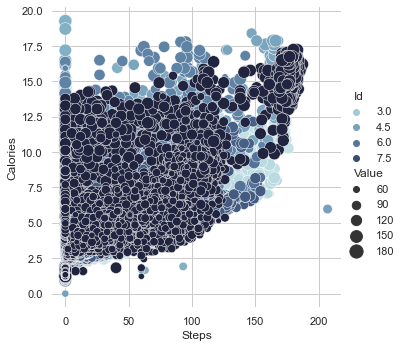

In [58]:
import seaborn as sns
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df2,
    x="Steps", y="Calories",
    hue="Id", size="Value",
    palette=cmap, sizes=(10, 200),
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

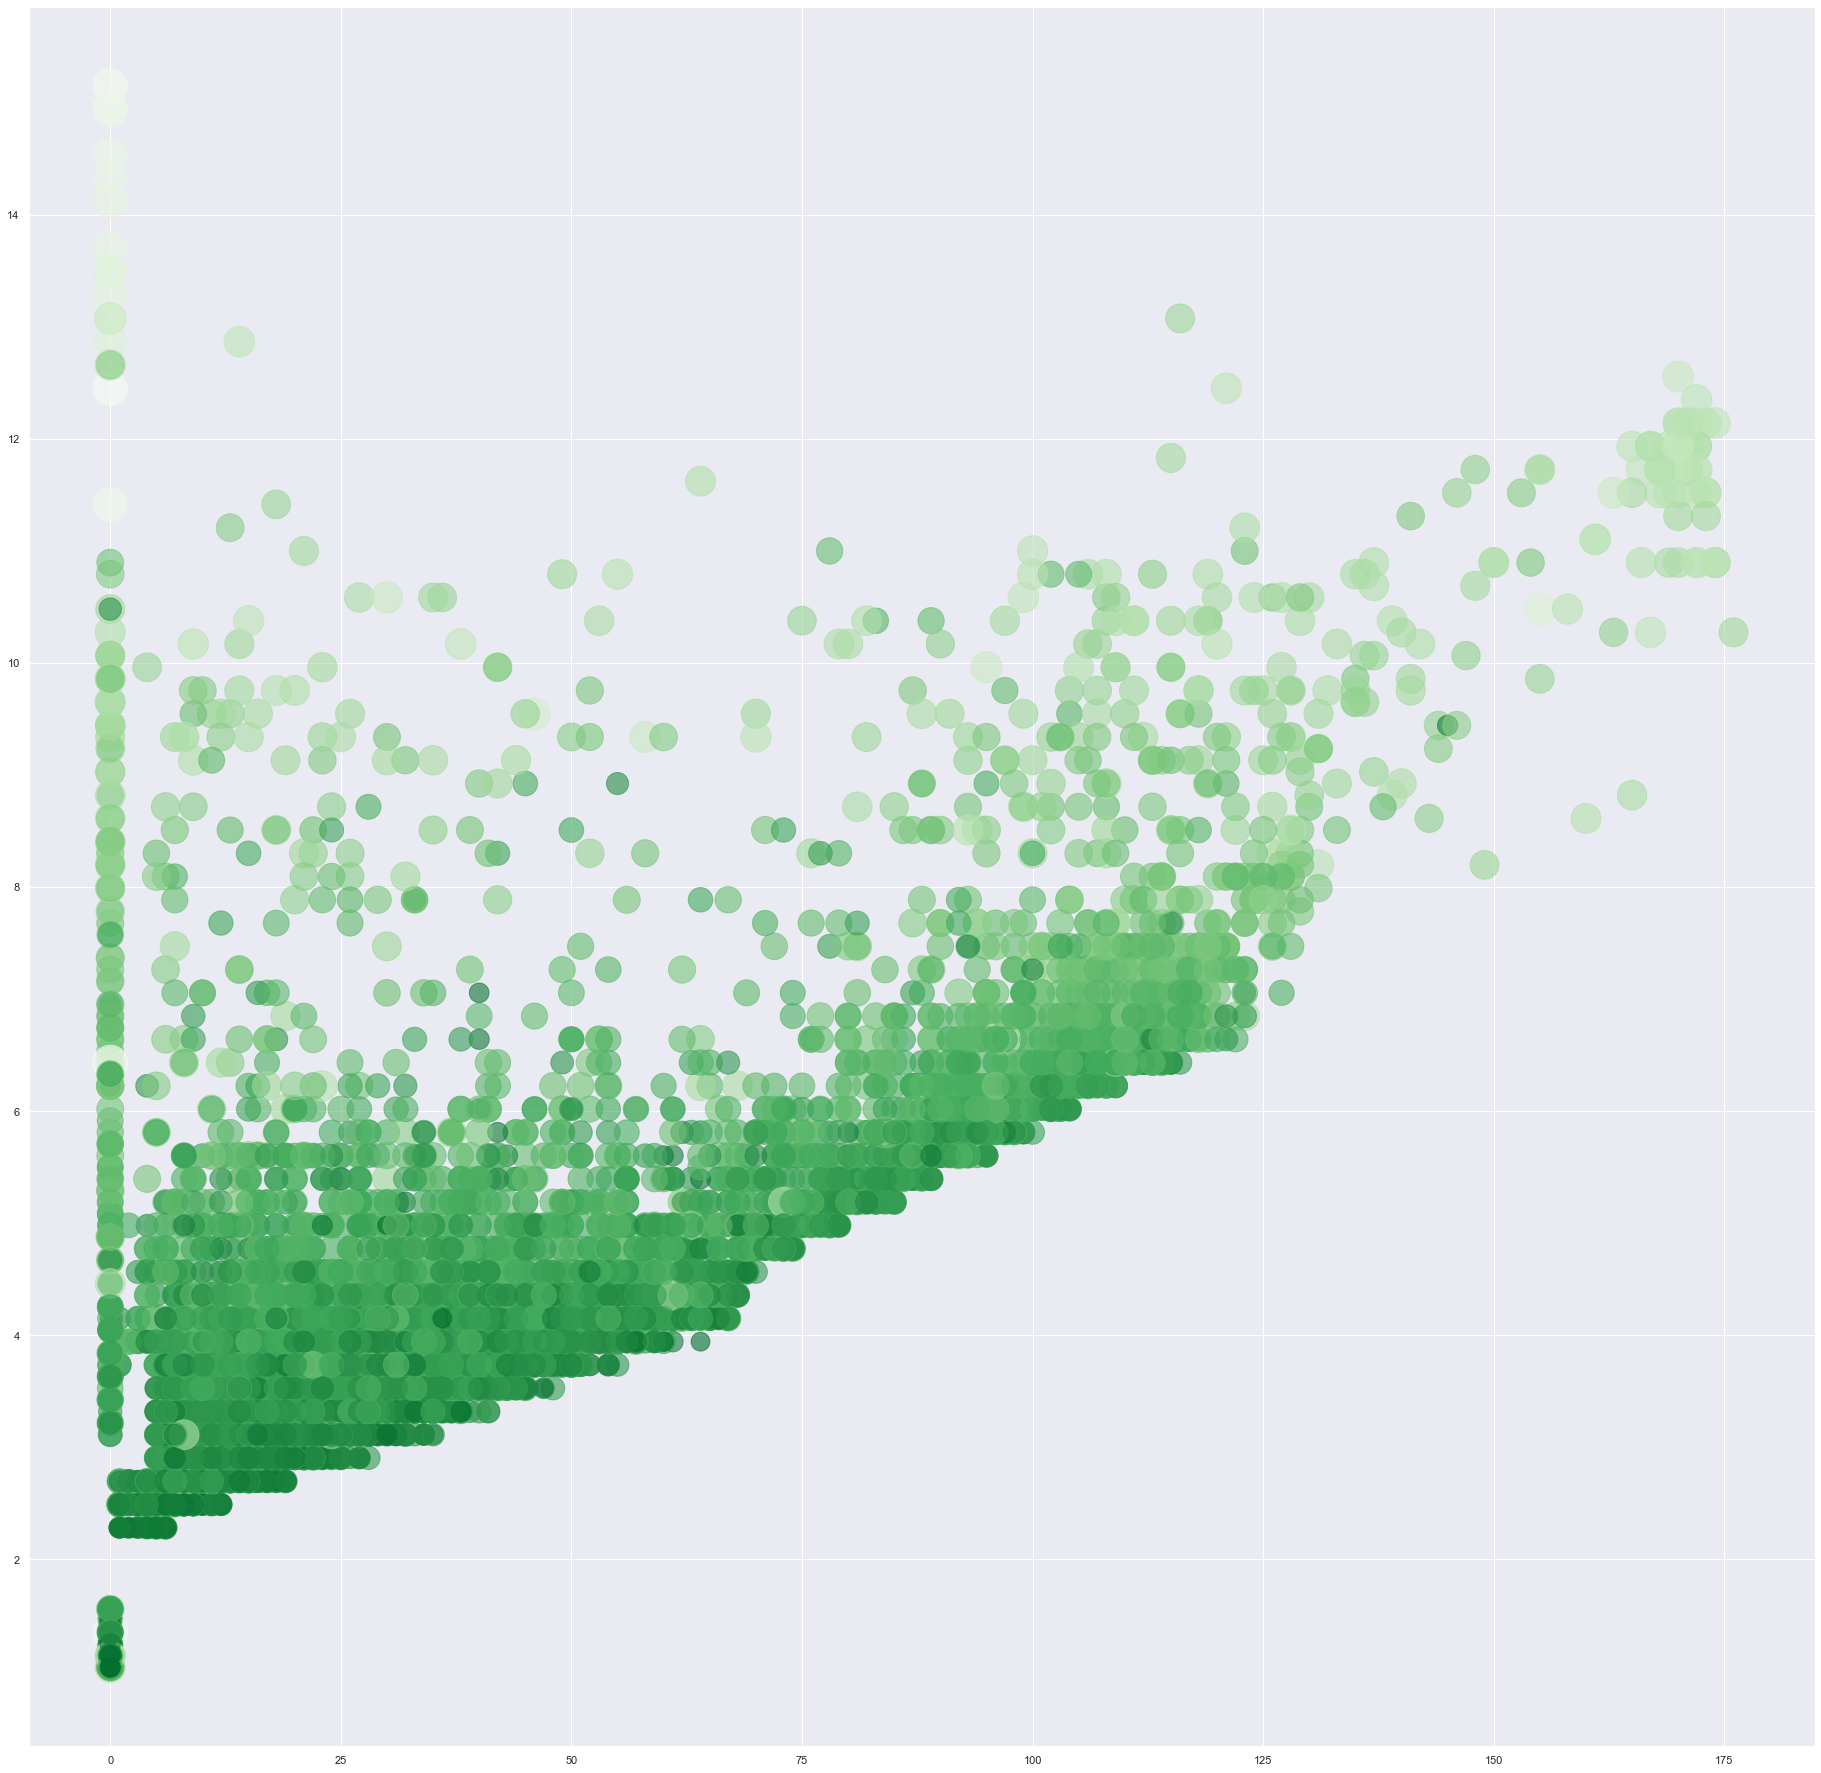

In [125]:
f = plt.figure()
f.set_figwidth(32)
f.set_figheight(32)
plt.scatter(df3.Steps, df3.Calories, s=df3.Value*6, c=df3.Value, cmap='Greens_r', alpha = 0.6, marker='o', facecolor = 'none')

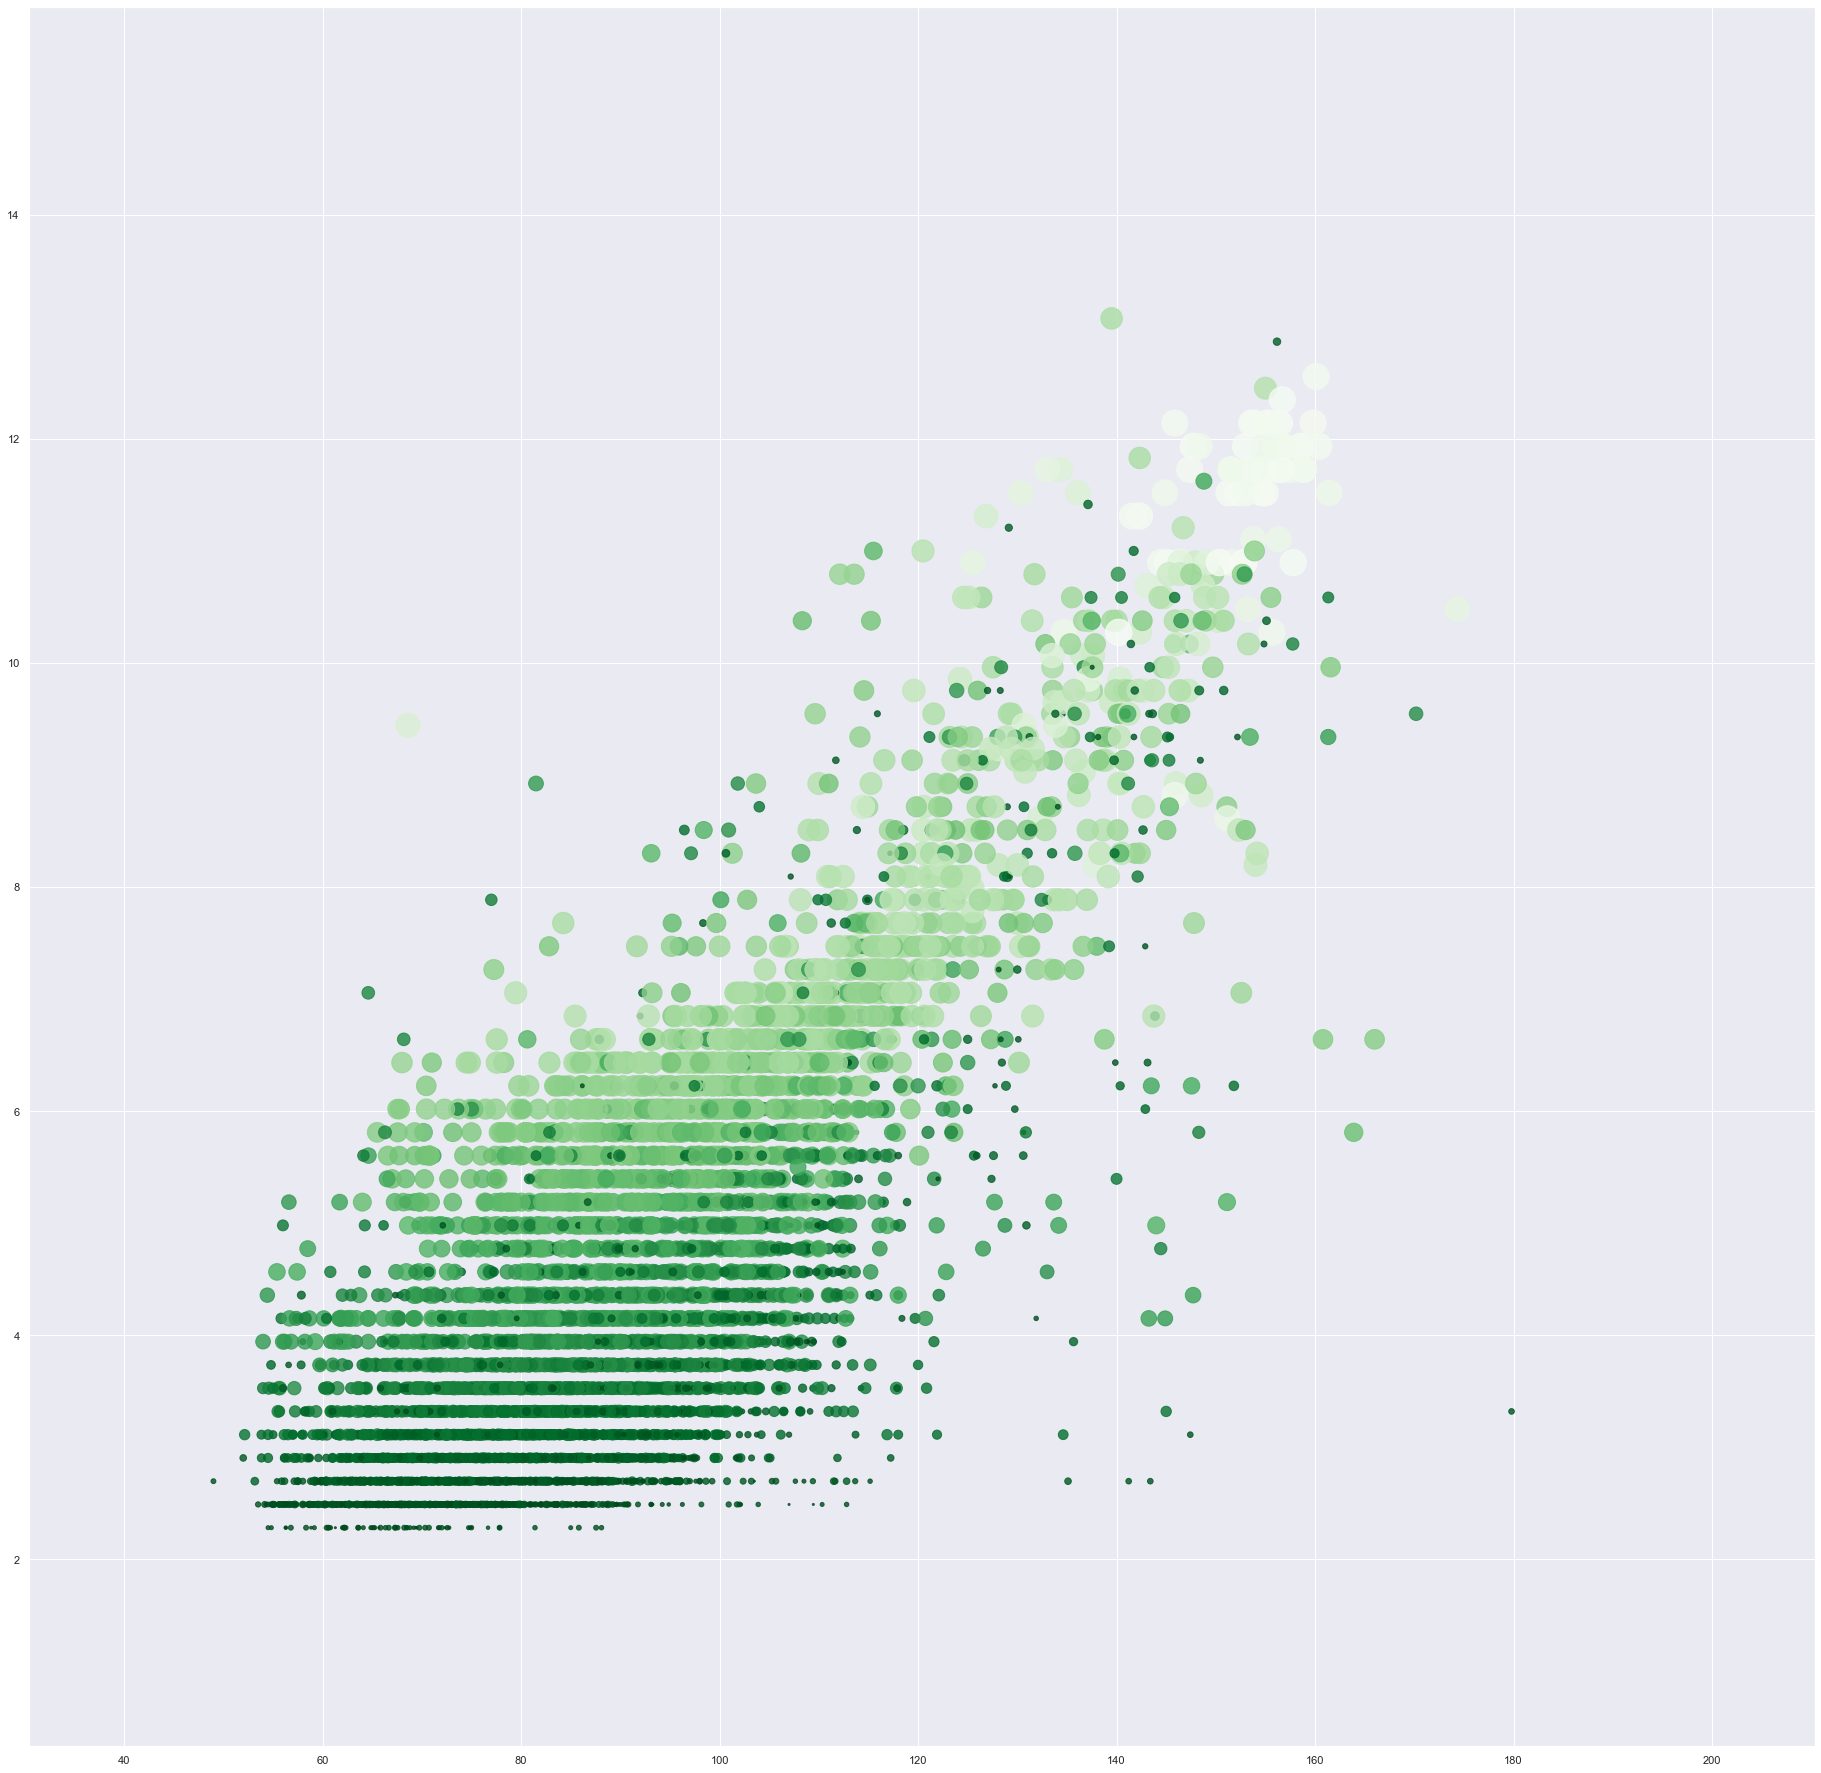

In [128]:
df3 = df2.loc[df2.Id ==2022484408]
f = plt.figure()
f.set_figwidth(32)
f.set_figheight(32)
plt.scatter(df3.Value, df3.Calories, s=df3.Steps*4, c=df3.Steps, cmap='Greens_r', alpha = 0.8, marker='o', facecolor = 'none')

plt.show()

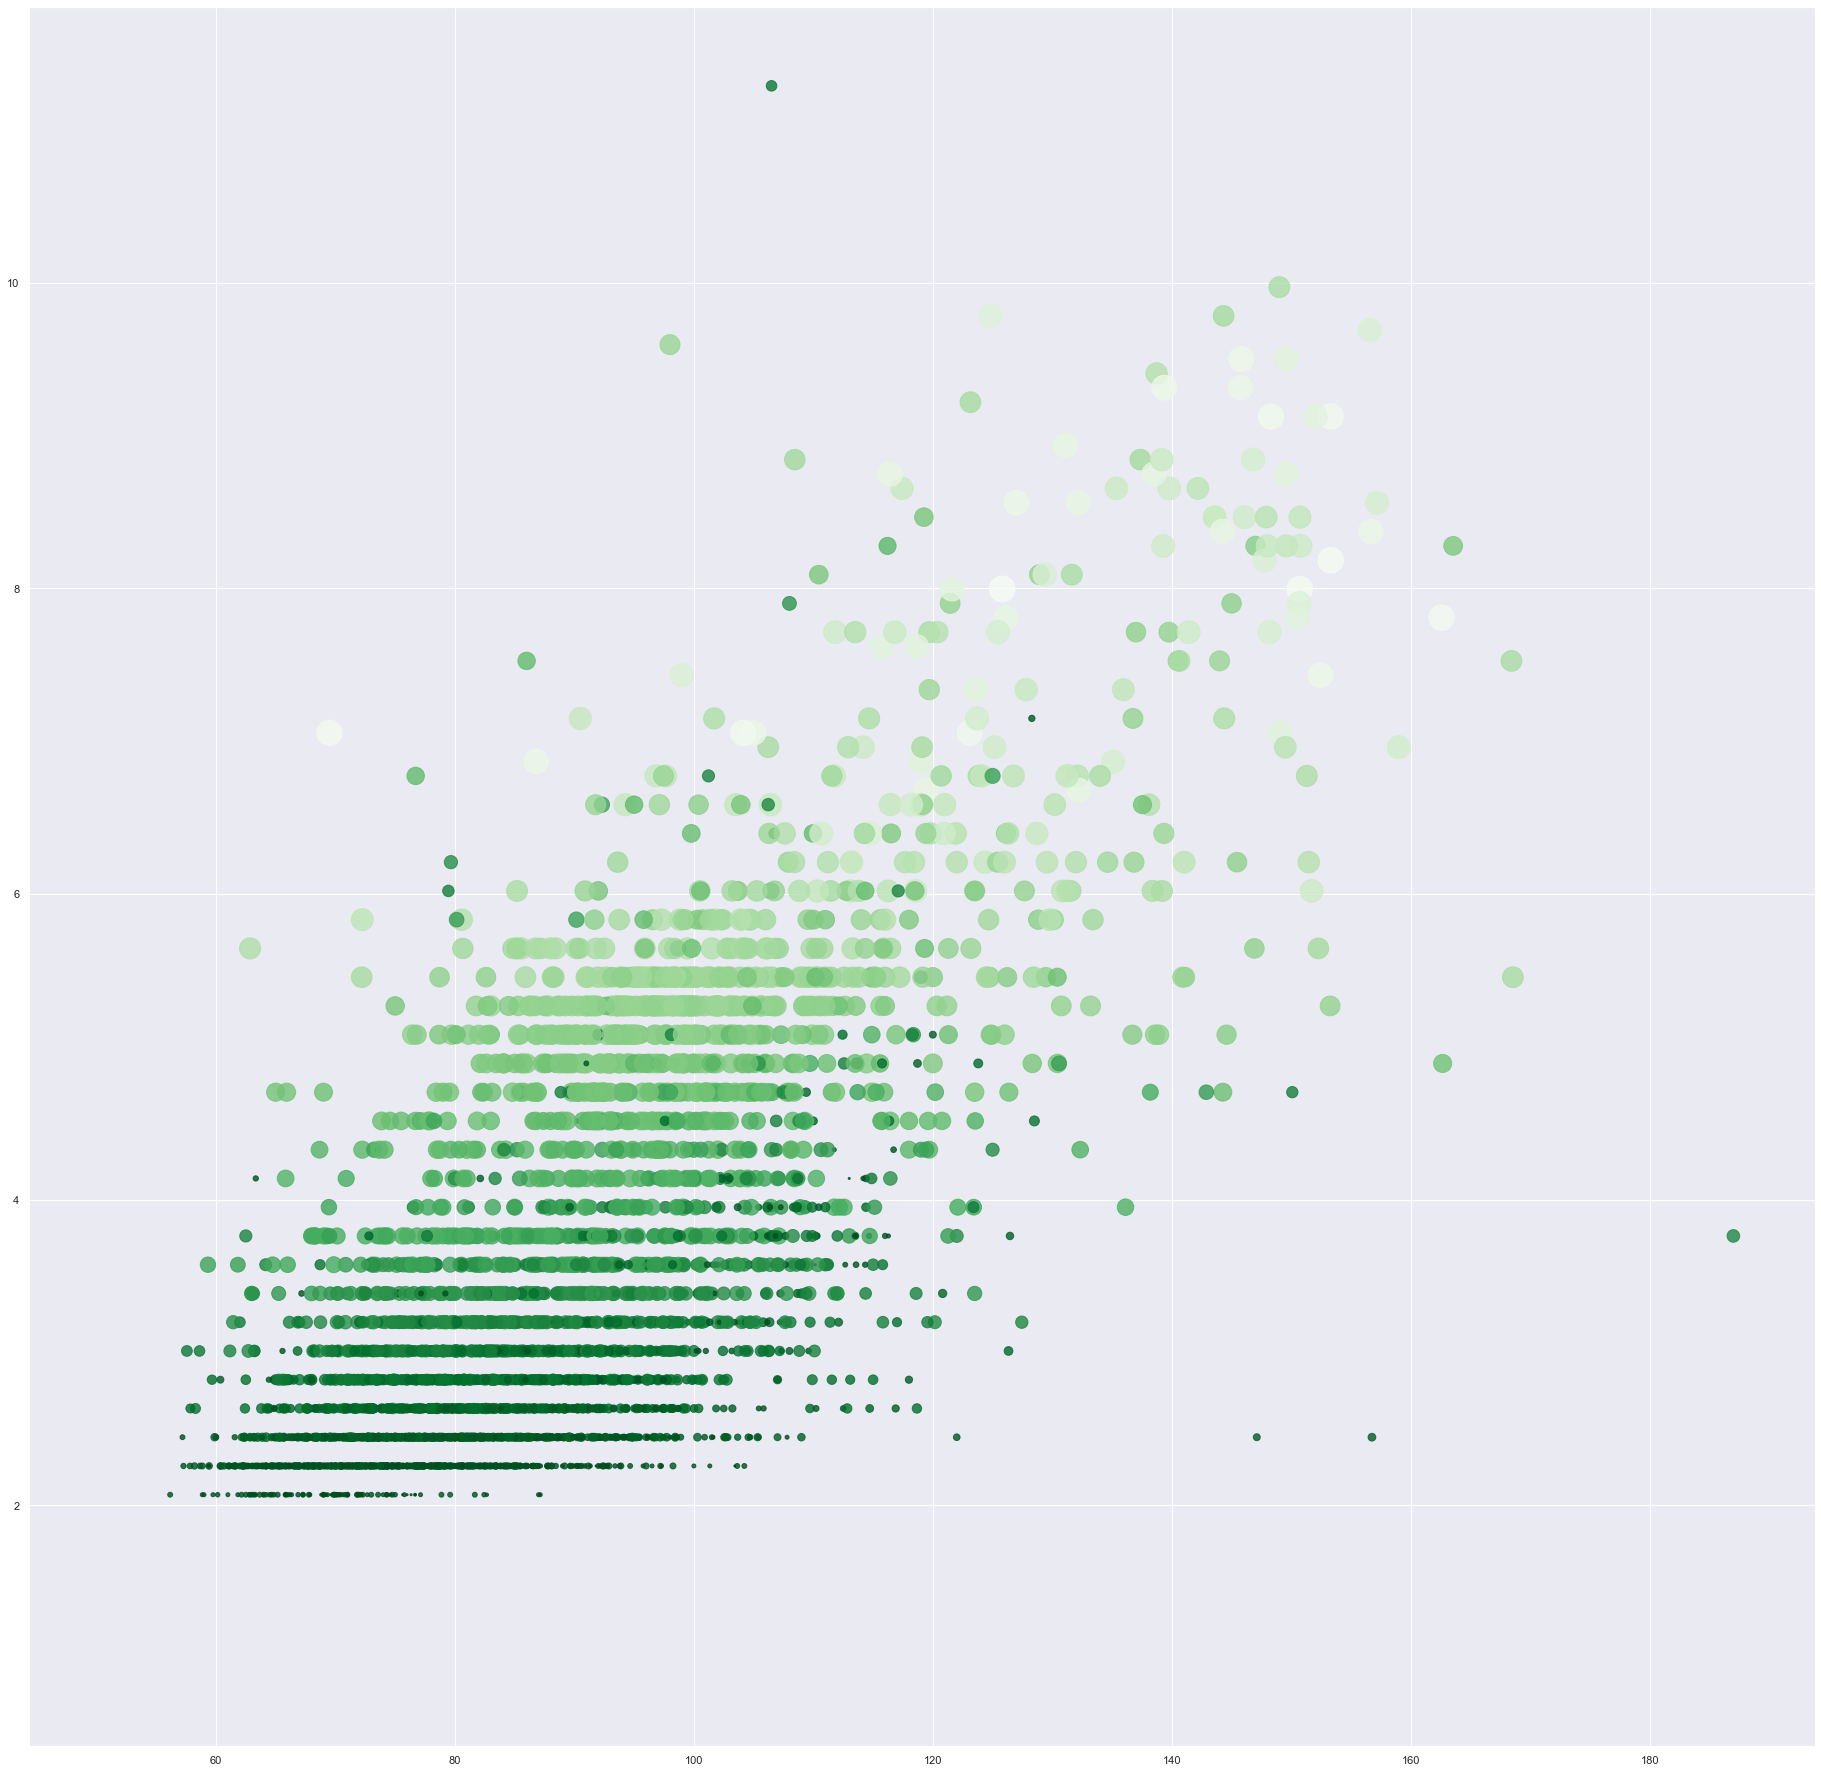

In [133]:
df3 = df2.loc[df2.Id == 2347167796]
f = plt.figure()
f.set_figwidth(32)
f.set_figheight(32)
plt.scatter(df3.Value, df3.Calories, s=df3.Steps*4, c=df3.Steps, cmap='Greens_r', alpha = 0.8, marker='o', facecolor = 'none')

plt.show()

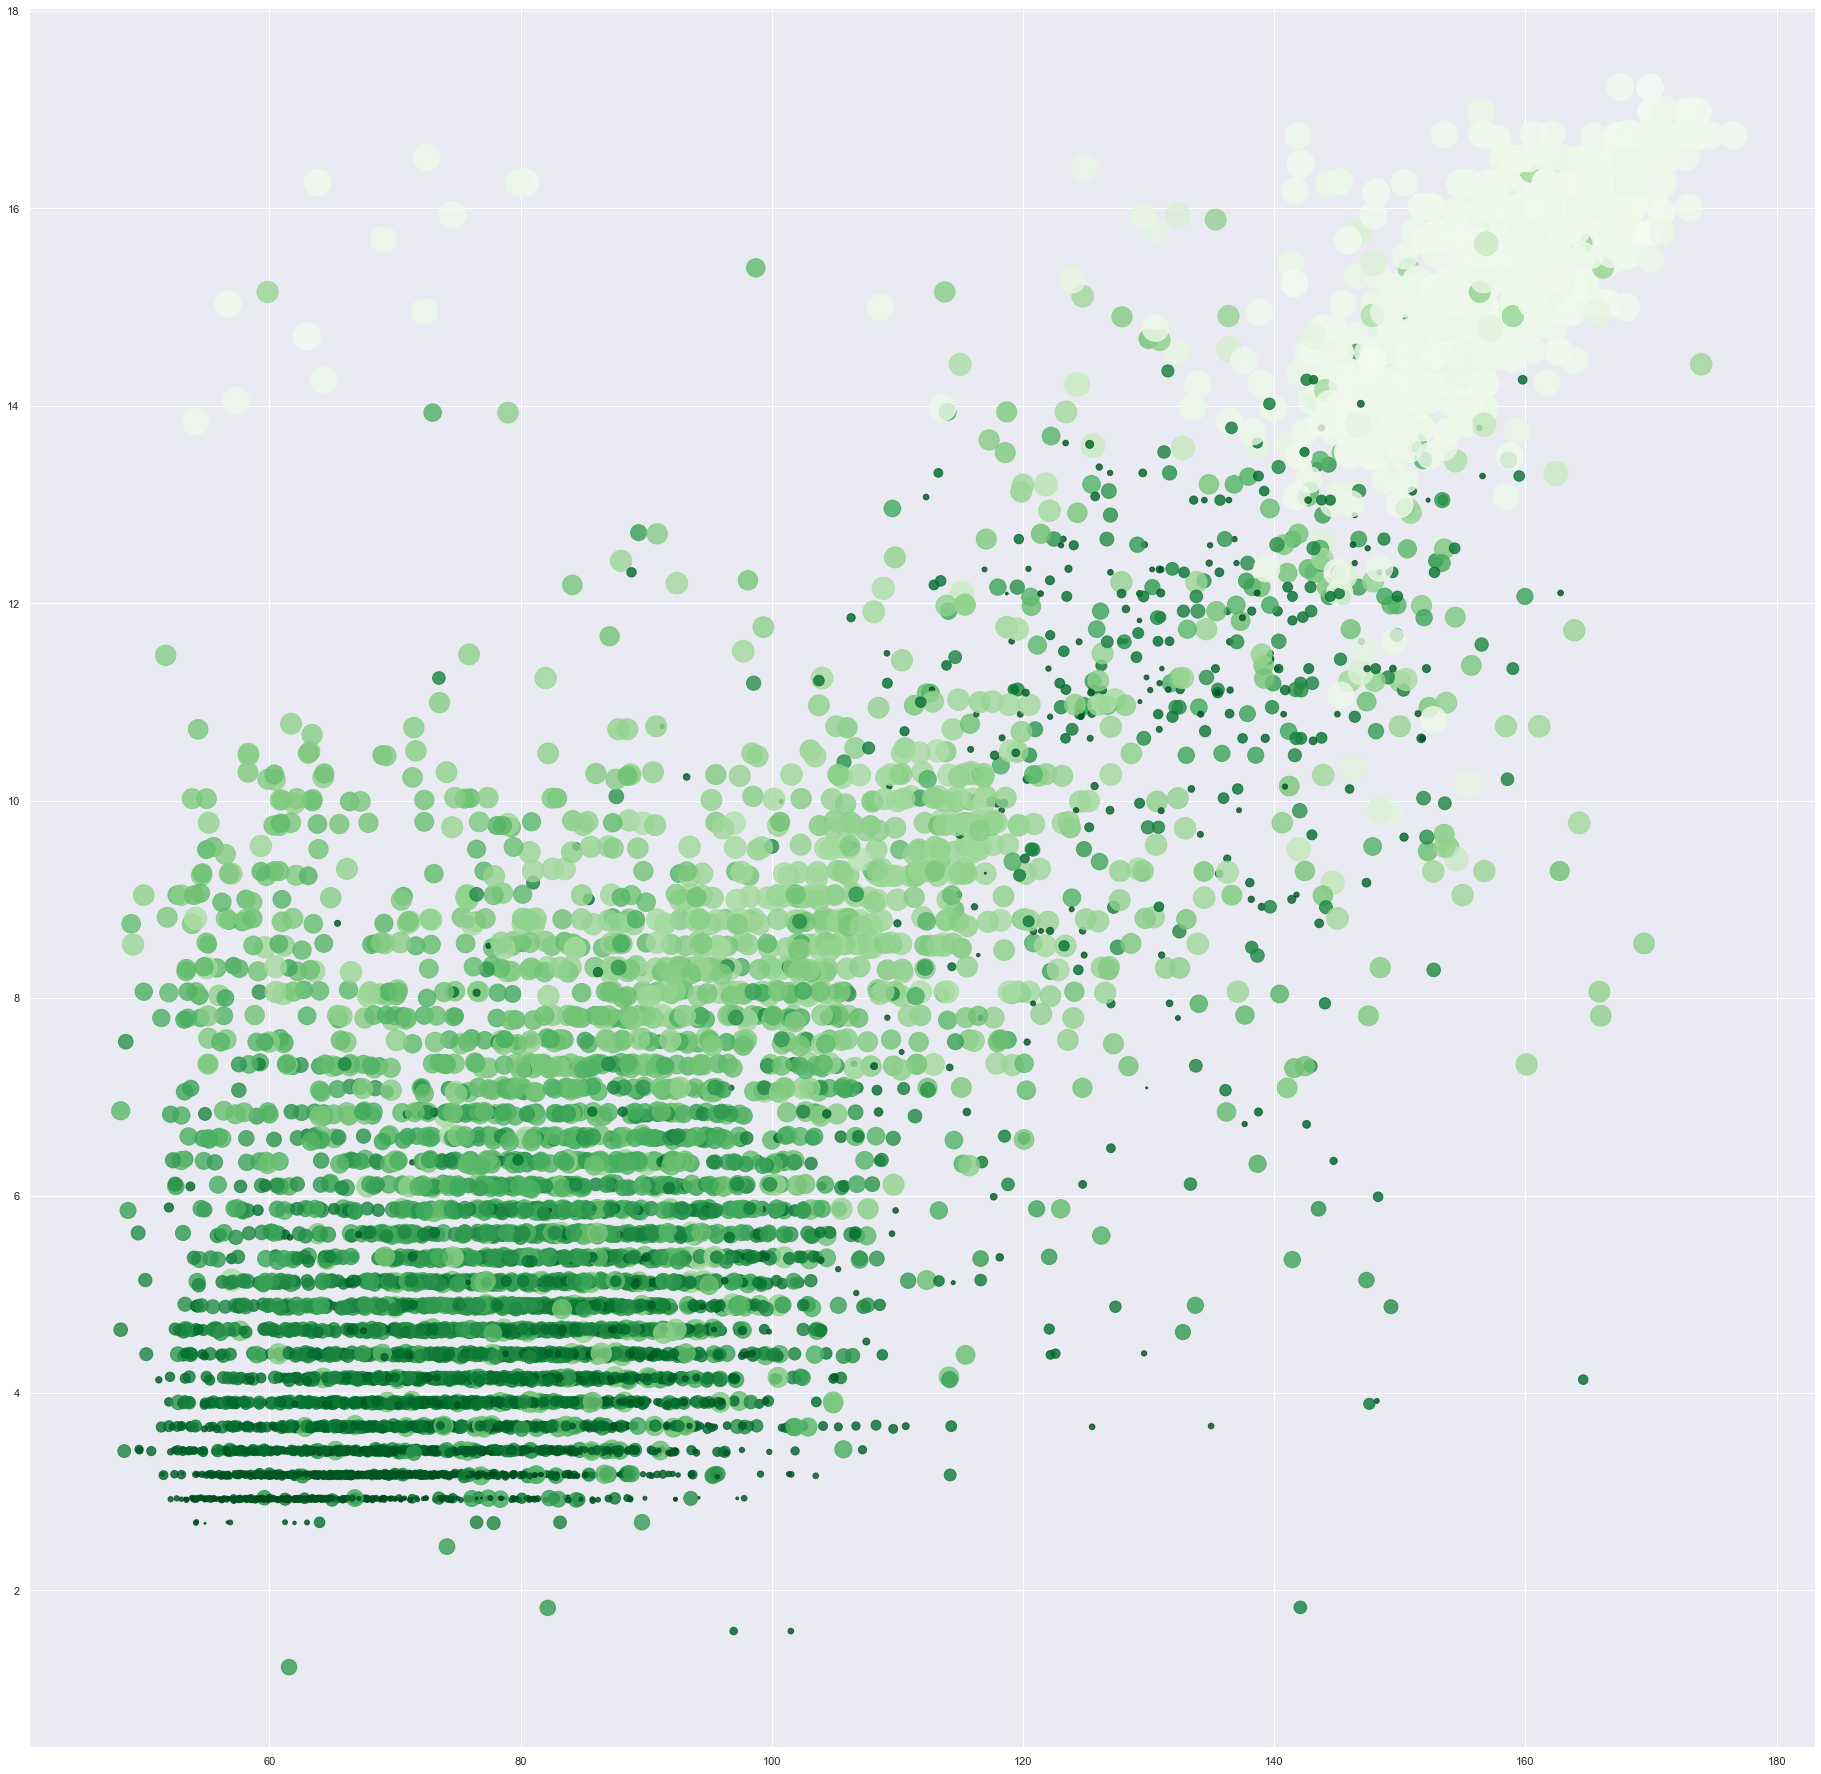

In [134]:
df3 = df2.loc[df2.Id == 8877689391]
f = plt.figure()
f.set_figwidth(32)
f.set_figheight(32)
plt.scatter(df3.Value, df3.Calories, s=df3.Steps*4, c=df3.Steps, cmap='Greens_r', alpha = 0.8, marker='o', facecolor = 'none')

plt.show()

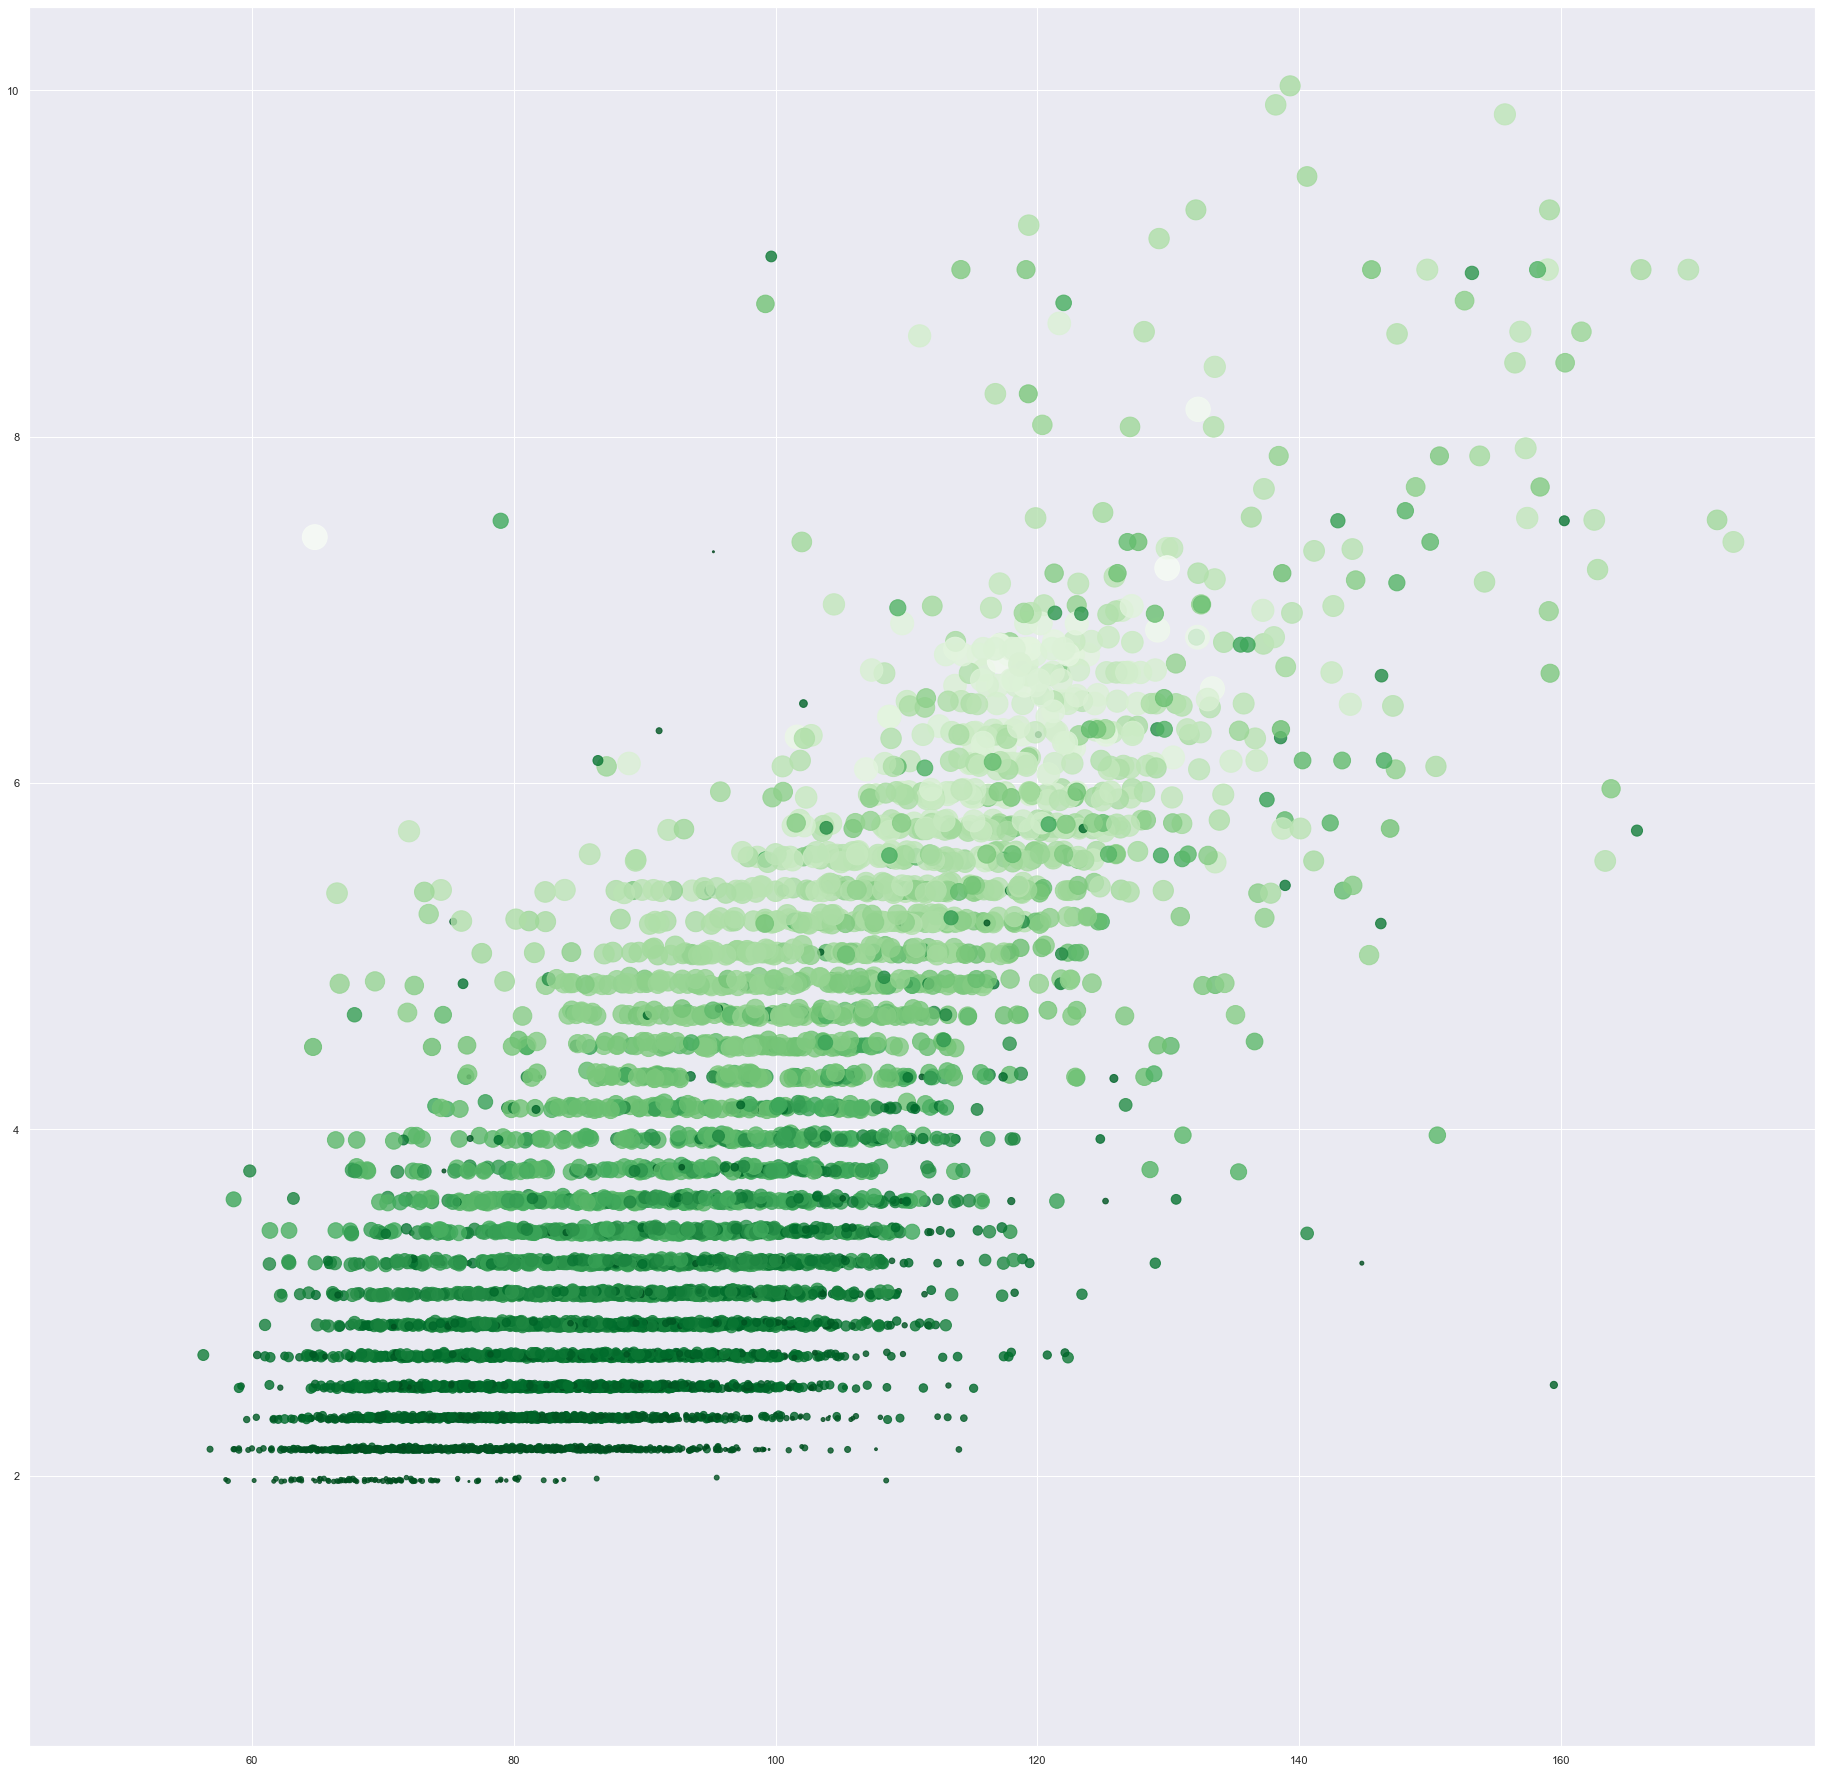

In [143]:
df3 = df2.loc[df2.Id == 6962181067]
f = plt.figure()
f.set_figwidth(32)
f.set_figheight(32)
plt.scatter(df3.Value, df3.Calories, s=df3.Steps*4, c=df3.Steps, cmap='Greens_r', alpha = 0.8, marker='o', facecolor = 'none')

plt.show()

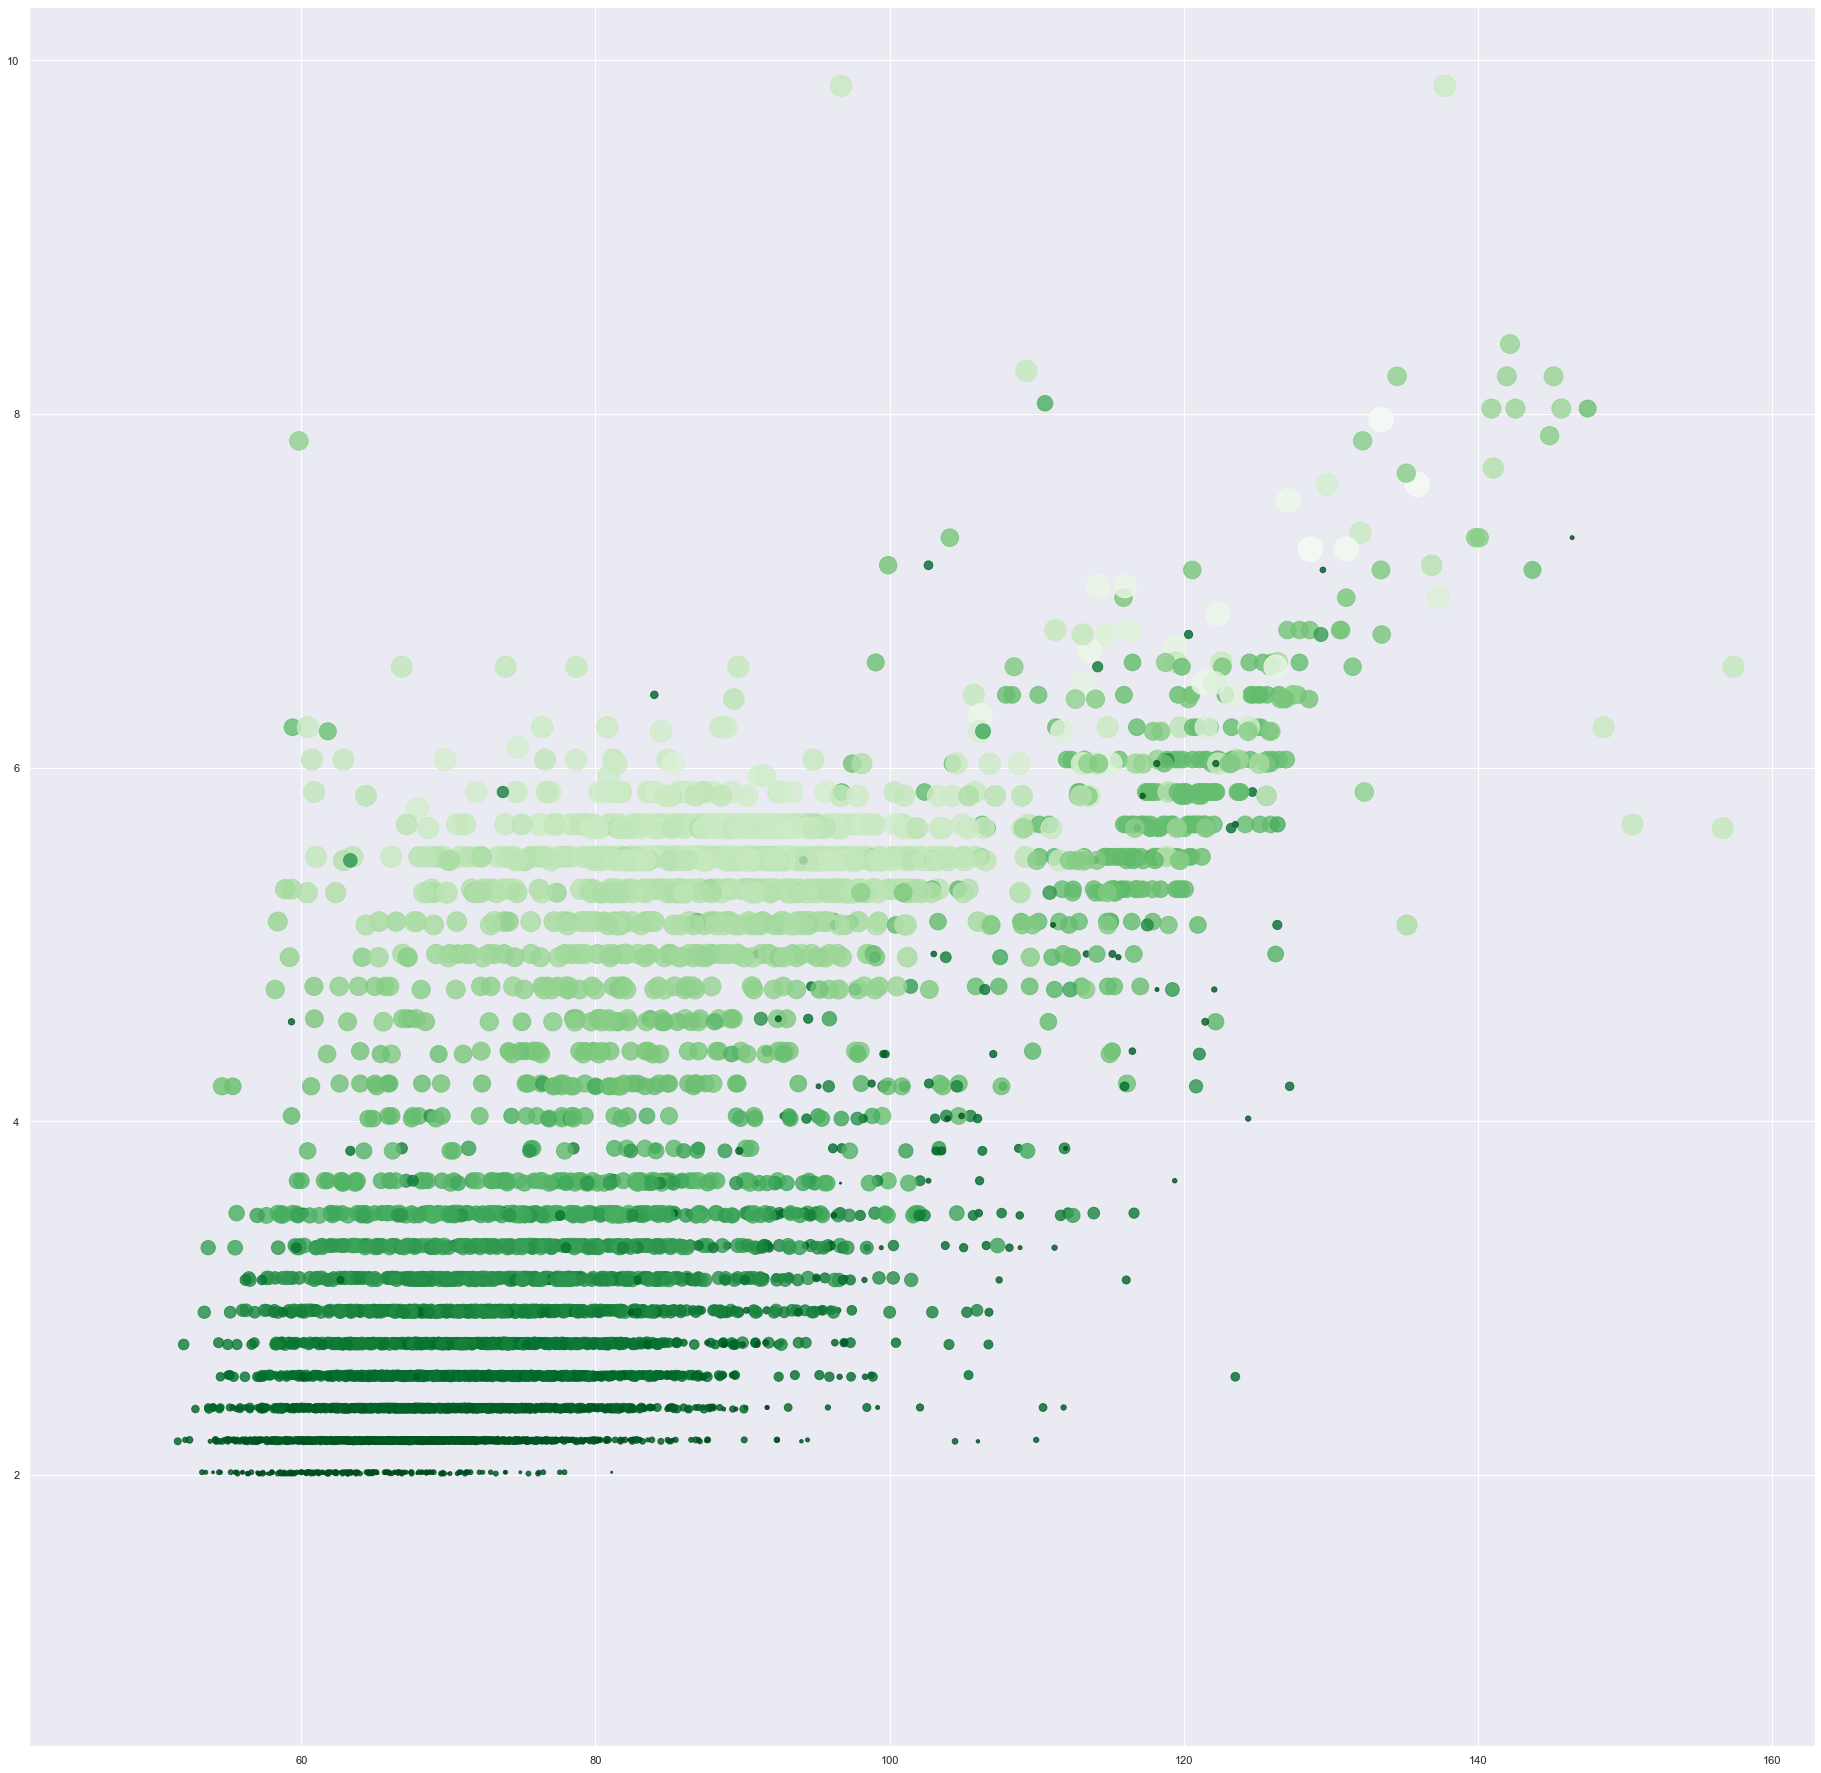

In [145]:
df3 = df2.loc[df2.Id == 5553957443]
f = plt.figure()
f.set_figwidth(32)
f.set_figheight(32)
plt.scatter(df3.Value, df3.Calories, s=df3.Steps*4, c=df3.Steps, cmap='Greens_r', alpha = 0.8, marker='o', facecolor = 'none')

plt.show()

In [144]:
df2[132135:132140]

Id      ActivityMinute_x  Calories        Date      Time  \
132135  5553957443  4/21/2016 3:42:00 PM    0.9160  2016-04-21  15:42:00   
132136  5553957443  4/21/2016 3:43:00 PM    1.0076  2016-04-21  15:43:00   
132137  5553957443  4/21/2016 3:44:00 PM    0.9160  2016-04-21  15:44:00   
132138  5553957443  4/21/2016 3:45:00 PM    0.9160  2016-04-21  15:45:00   
132139  5553957443  4/21/2016 3:46:00 PM    0.9160  2016-04-21  15:46:00   

            ActivityMinute_y  Steps  Hour  Min      Value  
132135  4/21/2016 3:42:00 PM      0    15   42  61.200000  
132136  4/21/2016 3:43:00 PM      0    15   43  62.166667  
132137  4/21/2016 3:44:00 PM      0    15   44  61.500000  
132138  4/21/2016 3:45:00 PM      0    15   45  62.200000  
132139  4/21/2016 3:46:00 PM      0    15   46  61.000000

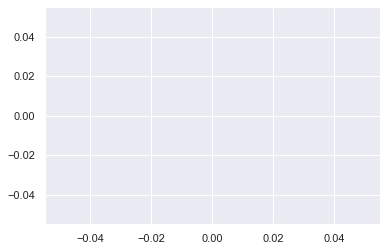

In [99]:
plt.scatter(df3.Steps, df3.Calories, s=df3.Value, c=df3.Id, cmap='Greens_r', alpha = 0.05, marker='o')

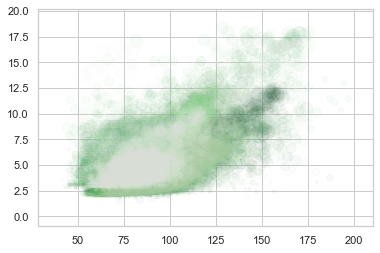

In [71]:
plt.scatter(df2.Value, df2.Calories, s=df2.Steps, c=df2.Id, cmap='Greens_r', alpha = 0.03, marker='o')

In [ ]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("sec_heartrate")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

In [19]:
sec_heartrate

Id                  Time  Value  Hour  Min
0        2022484408  4/12/2016 7:21:00 AM     97     7   21
1        2022484408  4/12/2016 7:21:05 AM    102     7   21
2        2022484408  4/12/2016 7:21:10 AM    105     7   21
3        2022484408  4/12/2016 7:21:20 AM    103     7   21
4        2022484408  4/12/2016 7:21:25 AM    101     7   21
...             ...                   ...    ...   ...  ...
2483653  8877689391  5/12/2016 2:43:53 PM     57    14   43
2483654  8877689391  5/12/2016 2:43:58 PM     56    14   43
2483655  8877689391  5/12/2016 2:44:03 PM     55    14   44
2483656  8877689391  5/12/2016 2:44:18 PM     55    14   44
2483657  8877689391  5/12/2016 2:44:28 PM     56    14   44

[2483658 rows x 5 columns]

In [8]:
sec_heartrate.Hour

0           7
1           7
2           7
3           7
4           7
           ..
2483653    14
2483654    14
2483655    14
2483656    14
2483657    14
Name: Time, Length: 2483658, dtype: int64

In [6]:
sec_heartrate.NewTime

0           7
1           7
2           7
3           7
4           7
           ..
2483653    14
2483654    14
2483655    14
2483656    14
2483657    14
Name: Time, Length: 2483658, dtype: int64

In [86]:
test1.dt.date

0          2016-04-12
1          2016-04-12
2          2016-04-12
3          2016-04-12
4          2016-04-12
              ...    
2483653    2016-05-12
2483654    2016-05-12
2483655    2016-05-12
2483656    2016-05-12
2483657    2016-05-12
Name: Time, Length: 2483658, dtype: object

In [75]:
sec_heartrate.dtypes

Id        int64
Time     object
Value     int64
dtype: object

In [79]:
sec_heartrate.NewTime

In [77]:
daily_intensity

Id ActivityDay  SedentaryMinutes  LightlyActiveMinutes  \
0    1503960366   4/12/2016               728                   328   
1    1503960366   4/13/2016               776                   217   
2    1503960366   4/14/2016              1218                   181   
3    1503960366   4/15/2016               726                   209   
4    1503960366   4/16/2016               773                   221   
..          ...         ...               ...                   ...   
935  8877689391    5/8/2016              1174                   245   
936  8877689391    5/9/2016              1131                   217   
937  8877689391   5/10/2016              1187                   224   
938  8877689391   5/11/2016              1127                   213   
939  8877689391   5/12/2016               770                   137   

     FairlyActiveMinutes  VeryActiveMinutes  SedentaryActiveDistance  \
0                     13                 25                     0.00   
1                     19                 21                     0.00   
2                     11                 30                     0.00   
3                     34                 29                     0.00   
4                     10                 36                     0.00   
..                   ...                ...                      ...   
935                    4                 17                     0.00   
936                   19                 73                     0.05   
937                   11                 18                     0.00   
938                   12                 88                     0.00   
939                    1                 23                     0.00   

     LightActiveDistance  ModeratelyActiveDistance  VeryActiveDistance  
0                   6.06                      0.55                1.88  
1                   4.71                      0.69                1.57  
2                   3.91                      0.40                2.44  
3                   2.83                      1.26                2.14  
4                   5.04                      0.41                2.71  
..                   ...                       ...                 ...  
935                 6.80                      0.20                1.08  
936                 6.24                      0.80               11.10  
937                 6.28                      0.46                1.35  
938                 5.89                      0.41               13.22  
939                 4.25                      0.04                1.82  

[940 rows x 10 columns]

In [12]:
df1 = pd.merge(daily_calories, daily_steps, on=['Id','ActivityDay'], how ="inner")

In [ ]:
df1 = pd.merge(df1, daily_calories, on=['Id','ActivityDay'], how ="inner")

In [ ]:
calories

In [ ]:
heartrate.rename(columns = {'Time':'ActivityMinute'}, inplace = True)

In [72]:
df1 = pd.merge(df1, sec_heartrate, on=['Id','ActivityMinute'], how ="inner")

KeyError: 'ActivityMinute'

In [14]:
df1

Id ActivityDay  Calories  StepTotal
0    1503960366   4/12/2016      1985      13162
1    1503960366   4/13/2016      1797      10735
2    1503960366   4/14/2016      1776      10460
3    1503960366   4/15/2016      1745       9762
4    1503960366   4/16/2016      1863      12669
..          ...         ...       ...        ...
935  8877689391    5/8/2016      2847      10686
936  8877689391    5/9/2016      3710      20226
937  8877689391   5/10/2016      2832      10733
938  8877689391   5/11/2016      3832      21420
939  8877689391   5/12/2016      1849       8064

[940 rows x 4 columns]

In [57]:
dataset = df1
print ("Data Preview: \n", dataset.head())# Top 10 lines of the df
#list(dataset)  # Columns of the df
print ("----")
print (" ")
#len(dataset)   # No of rows
print ("Dimensions of data (rows,columns): \n", dataset.shape)  # Dimensions of df
print ("----")
print (" ")
print ("Column datatypes: \n", dataset.dtypes) # Datatype of each column
print ("----")
print (" ")
print ("Class of object in each column *10th line")
for i in range (dataset.shape[1]):
    print (dataset.columns[i], 'is' ,type(dataset.iloc[:,i][10])) #returns the type of object in each column
                                               #type of the 14th line for each column
print ("----")
print (" ")
print ("Null Values per Column: \n", dataset.isnull().sum())
 # shows how many null values are in each colunm
print ("----")
print (" ")
print ('Unique Values Per Column:\n',dataset.nunique())
 # shows no of unique values for each column
print ("----")
print ('No of entries for each value in each column:\n',(dataset.iloc[:,-1]).value_counts())

Data Preview: 
            Id ActivityDay  Calories  StepTotal  Cal_div_Step
0  1503960366   4/12/2016      1985      13162      0.150813
1  1503960366   4/13/2016      1797      10735      0.167396
2  1503960366   4/14/2016      1776      10460      0.169790
3  1503960366   4/15/2016      1745       9762      0.178754
4  1503960366   4/16/2016      1863      12669      0.147052
----
 
Dimensions of data (rows,columns): 
 (940, 5)
----
 
Column datatypes: 
 Id                int64
ActivityDay      object
Calories          int64
StepTotal         int64
Cal_div_Step    float64
dtype: object
----
 
Class of object in each column *10th line
Id is <class 'numpy.int64'>
ActivityDay is <class 'str'>
Calories is <class 'numpy.int64'>
StepTotal is <class 'numpy.int64'>
Cal_div_Step is <class 'numpy.float64'>
----
 
Null Values per Column: 
 Id              0
ActivityDay     0
Calories        0
StepTotal       0
Cal_div_Step    4
dtype: int64
----
 
Unique Values Per Column:
 Id               33

In [12]:
#scatter plot for the dataset
plt.scatter(df1.StepTotal, df1.Calories)
plt.title('Steps Vs Calories')
plt.xlabel('Steps')
plt.ylabel('Calories')
plt.legend()
plt.show()

NameError: name 'df1' is not defined

In [69]:
df2

Id ActivityDay  Calories  StepTotal  Cal_div_Step
0    1503960366   4/12/2016      1985      13162      0.150813
1    1503960366   4/13/2016      1797      10735      0.167396
2    1503960366   4/14/2016      1776      10460      0.169790
3    1503960366   4/15/2016      1745       9762      0.178754
4    1503960366   4/16/2016      1863      12669      0.147052
..          ...         ...       ...        ...           ...
935  8877689391    5/8/2016      2847      10686      0.266423
936  8877689391    5/9/2016      3710      20226      0.183427
937  8877689391   5/10/2016      2832      10733      0.263859
938  8877689391   5/11/2016      3832      21420      0.178898
939  8877689391   5/12/2016      1849       8064      0.229291

[842 rows x 5 columns]

<AxesSubplot:xlabel='StepTotal', ylabel='Calories'>

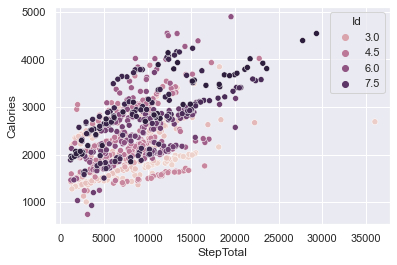

In [89]:
df2 = df1[df1['StepTotal'] > 1000]

sns.scatterplot(data=df2, x="StepTotal", y="Calories", hue="Id")

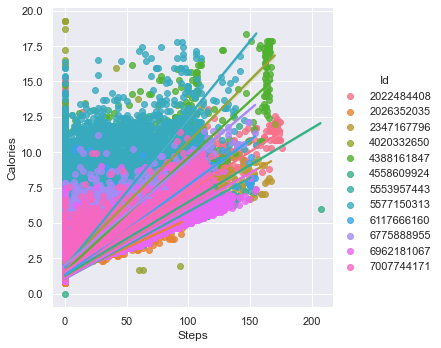

In [93]:
sns.set_theme()

# Load the dataset

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=df3,
    x="Steps", y="Calories", hue="Id",
    height=5
)
# Use more informative axis labels than are provided by default
g.set_axis_labels("Steps", "Calories")

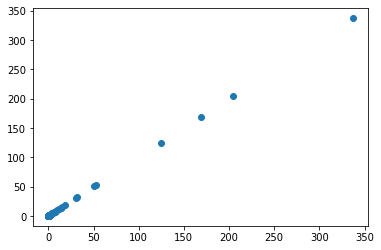

In [55]:
plt.scatter(df1.Calories, df1.Cal_div_Step)
plt.show()

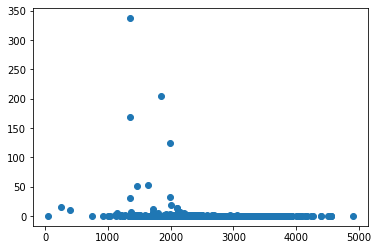

In [30]:
plt.scatter(df1.Calories, df1.Cal_div_Step)
plt.show()

In [19]:
dataset = df1
X = dataset.iloc[:, [2, 3]].values
#on k_means_clustering we do not have a dependend variable, we create a dependend variable
#

In [60]:
X

array([[ 1985, 13162],
       [ 1797, 10735],
       [ 1776, 10460],
       ...,
       [ 2832, 10733],
       [ 3832, 21420],
       [ 1849,  8064]], dtype=int64)

In [24]:
df1

Id ActivityDay  Calories  StepTotal
0    1503960366   4/12/2016      1985      13162
1    1503960366   4/13/2016      1797      10735
2    1503960366   4/14/2016      1776      10460
3    1503960366   4/15/2016      1745       9762
4    1503960366   4/16/2016      1863      12669
..          ...         ...       ...        ...
935  8877689391    5/8/2016      2847      10686
936  8877689391    5/9/2016      3710      20226
937  8877689391   5/10/2016      2832      10733
938  8877689391   5/11/2016      3832      21420
939  8877689391   5/12/2016      1849       8064

[940 rows x 4 columns]

In [28]:
df1

Id ActivityDay  Calories  StepTotal  Cal_div_Step
0    1503960366   4/12/2016      1985      13162      0.150813
1    1503960366   4/13/2016      1797      10735      0.167396
2    1503960366   4/14/2016      1776      10460      0.169790
3    1503960366   4/15/2016      1745       9762      0.178754
4    1503960366   4/16/2016      1863      12669      0.147052
..          ...         ...       ...        ...           ...
935  8877689391    5/8/2016      2847      10686      0.266423
936  8877689391    5/9/2016      3710      20226      0.183427
937  8877689391   5/10/2016      2832      10733      0.263859
938  8877689391   5/11/2016      3832      21420      0.178898
939  8877689391   5/12/2016      1849       8064      0.229291

[940 rows x 5 columns]

In [27]:
df1['Cal_div_Step']=df1['Calories']/df1['StepTotal']

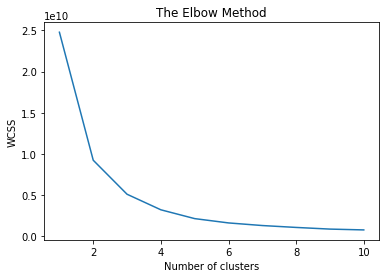

In [ ]:
#no of clusters = 4 according to the visual elbow method

In [34]:
kmeans = KMeans(n_clusters = 6 , init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X) # trains the model and creates the y variable

In [33]:
print (y_kmeans)

[1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 2 0 0 0 2 2 0
 0 2 2 0 2 0 0 0 2 0 2 2 0 1 0 2 2 2 2 2 2 2 2 2 2 0 0 0 2 1 0 0 0 2 2 2 0
 2 2 0 2 0 2 1 0 2 1 2 2 0 1 0 0 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 2 1 1 1 0
 2 2 2 2 2 2 2 2 0 2 2 1 2 0 0 0 0 0 2 2 0 0 0 1 0 2 2 0 2 0 0 0 0 2 2 2 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 0 2 0 0 0 0 1 2 0 0 0 0 0 1
 0 0 0 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0
 2 0 0 2 0 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 2 2 0 0 0 0 0 0 2 0 0 0 1 0 0
 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 2 2
 2 2 0 2 2 0 2 2 2 0 2 2 2 0 0 2 2 0 2 0 0 2 2 2 2 0 2 2 0 2 2 2 0 0 0 0 0
 2 2 1 0 0 0 0 0 0 0 0 0 

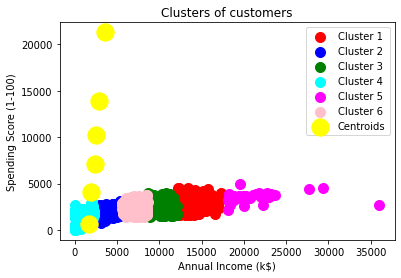

In [59]:
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 1') 
#explanation:
#X[y_kmeans == A, B] --> 
#A: selecting all the customers for which y_kmeans = A, a filter method
#B: ((first coordinate of the X variables from the initial features, index of variable)-->annual income)]
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 0], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 1], X[y_kmeans == 4, 0], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 1], X[y_kmeans == 5, 0], s = 100, c = 'pink', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
#calling an attribute (->cluster_centers_) of the object (kmeans) of the Class  KMeans
#Calling the cluster_centers_ attribute returns a 2d array that the 
#row no is the cluster no, and the columns correspond to their coordinates

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

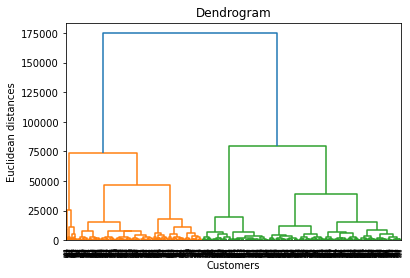

In [38]:
import scipy.cluster.hierarchy as sch  #scipy library tool
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [43]:
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 |  
 |  Agglomerative Clustering
 |  
 |  Recursively merges the pair of clusters that minimally increases
 |  a given linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or "precomputed".
 |      If linkage is "ward", only "euclidean" is accepted.
 |    

In [51]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'l2', linkage = 'average') #ward is the minimum variance method
y_hc = hc.fit_predict(X) #trains and creates the variable 

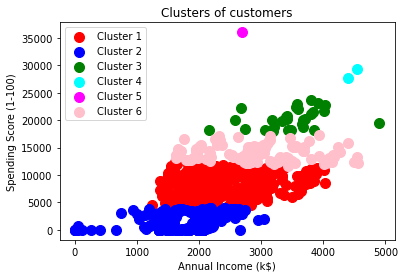

In [52]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'pink', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

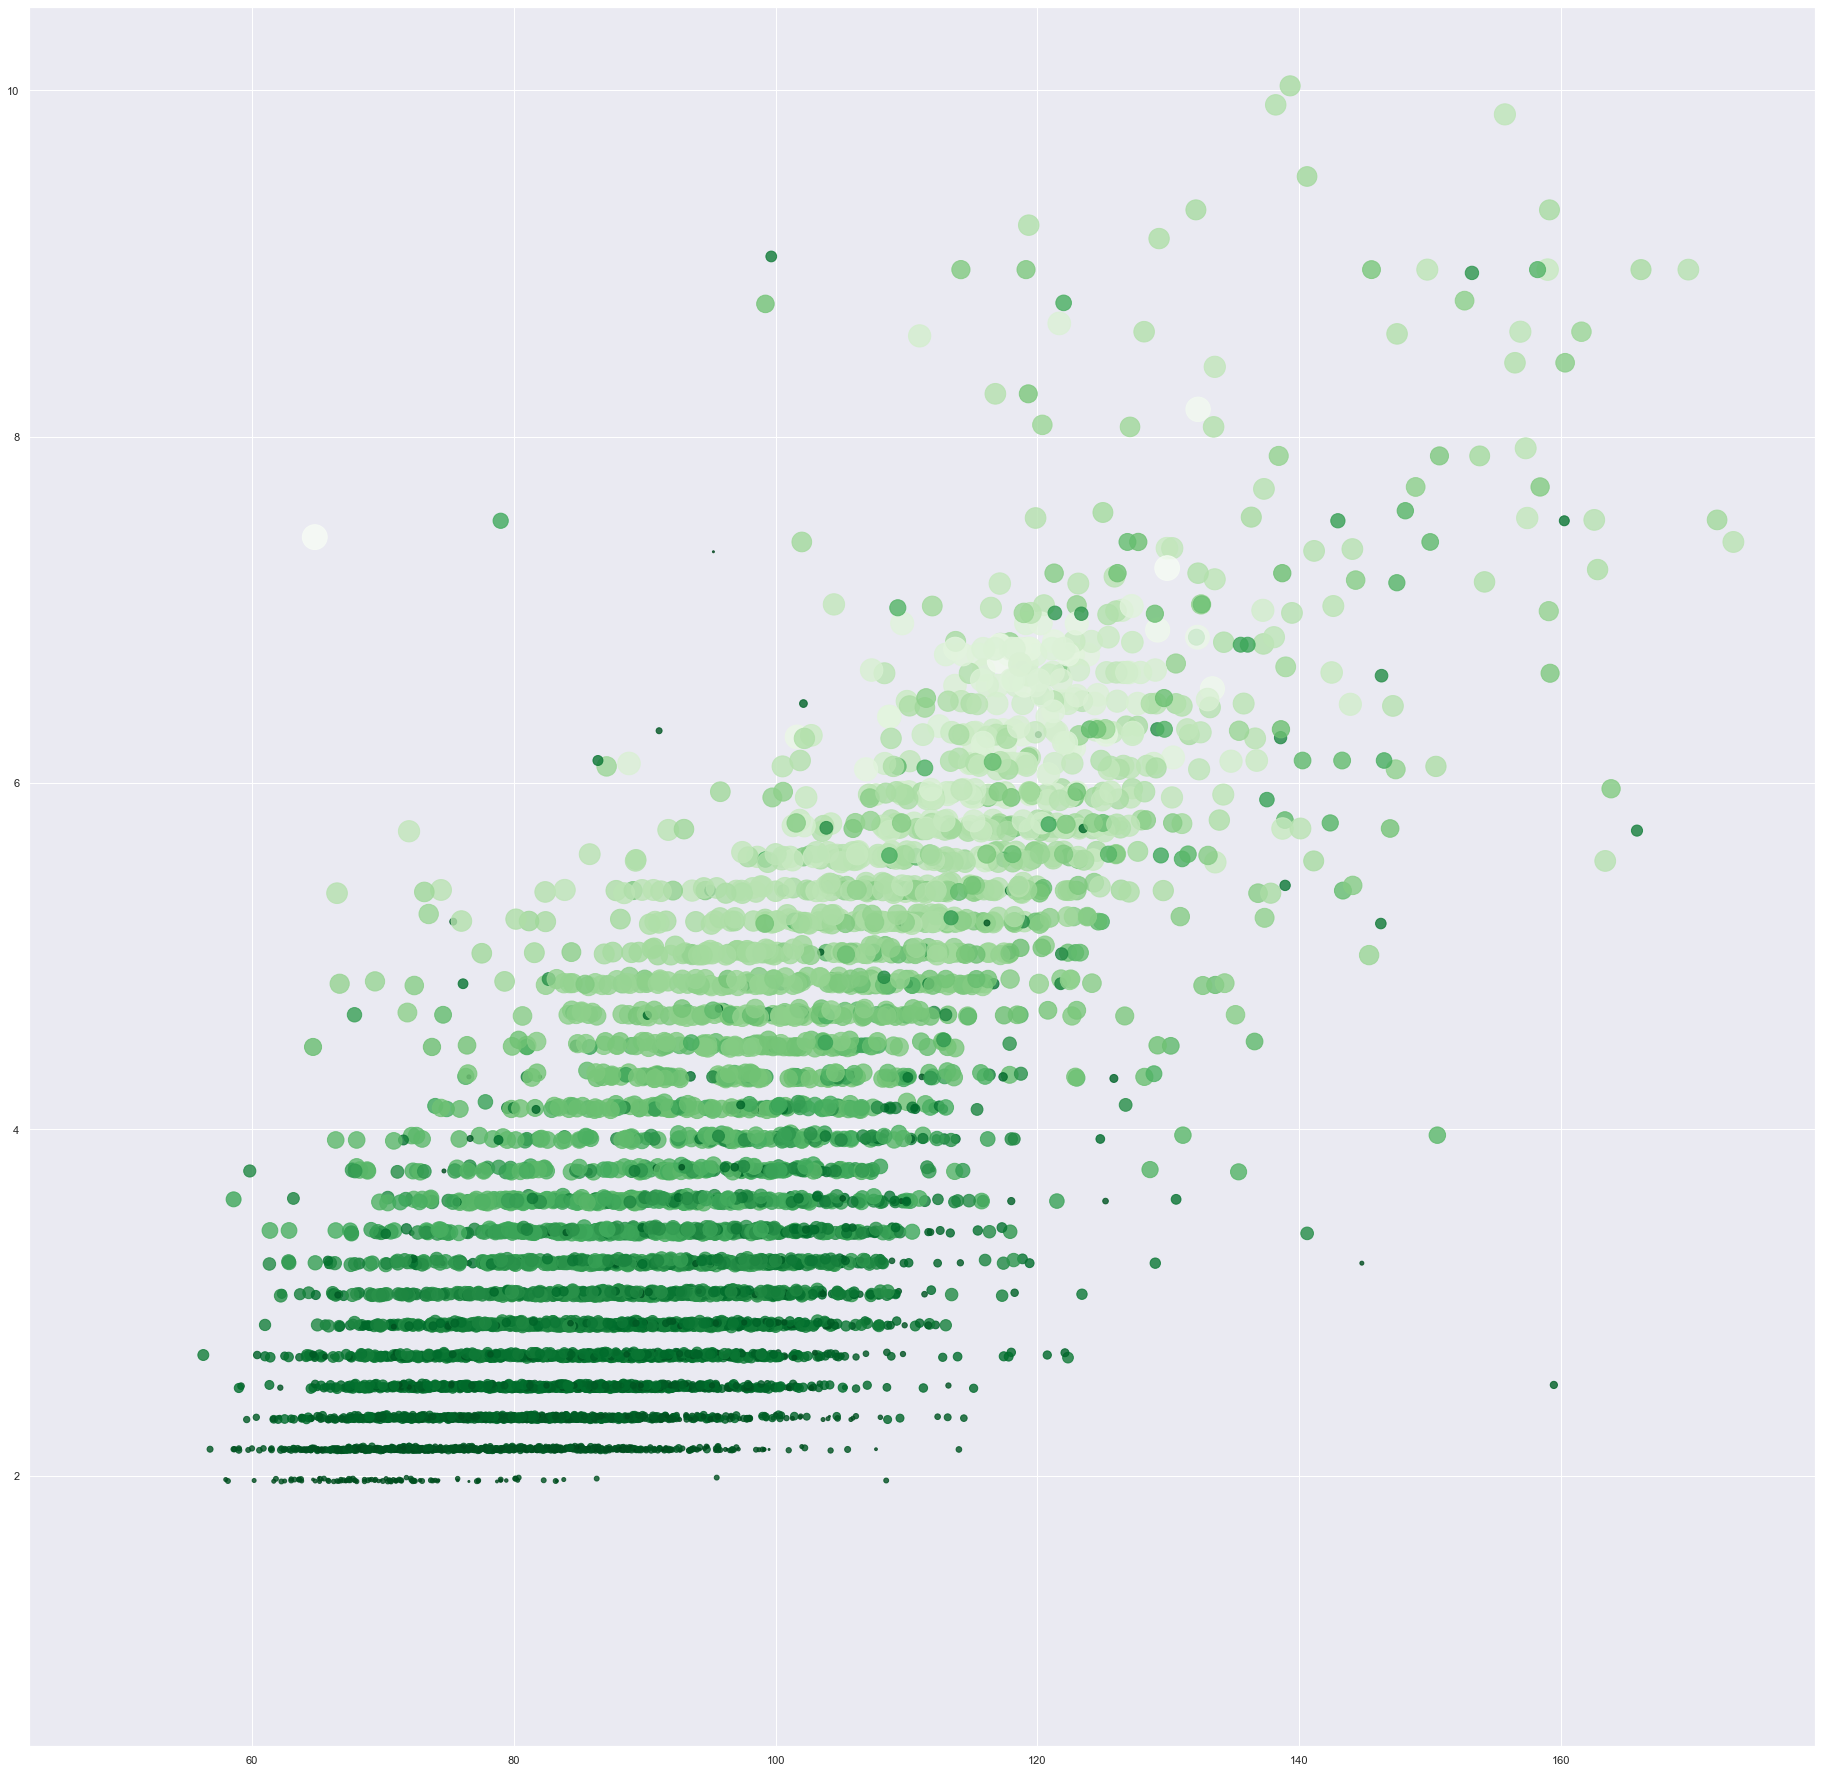

In [146]:
df3 = df2.loc[df2.Id == 6962181067]
f = plt.figure()
f.set_figwidth(32)
f.set_figheight(32)
plt.scatter(df3.Value, df3.Calories, s=df3.Steps*4, c=df3.Steps, cmap='Greens_r', alpha = 0.8, marker='o', facecolor = 'none')

plt.show()

In [229]:
df2

Id      ActivityMinute_x  Calories        Date      Time  \
0       2022484408  4/12/2016 7:20:00 AM   1.03770  2016-04-12  07:20:00   
1       2022484408  4/12/2016 7:21:00 AM   3.32064  2016-04-12  07:21:00   
2       2022484408  4/12/2016 7:22:00 AM   3.94326  2016-04-12  07:22:00   
3       2022484408  4/12/2016 7:23:00 AM   1.34901  2016-04-12  07:23:00   
4       2022484408  4/12/2016 7:24:00 AM   1.03770  2016-04-12  07:24:00   
...            ...                   ...       ...         ...       ...   
333141  8877689391  5/12/2016 1:55:00 PM   1.33353  2016-05-12  13:55:00   
333142  8877689391  5/12/2016 1:56:00 PM   1.33353  2016-05-12  13:56:00   
333143  8877689391  5/12/2016 1:57:00 PM   1.33353  2016-05-12  13:57:00   
333144  8877689391  5/12/2016 1:58:00 PM   1.33353  2016-05-12  13:58:00   
333145  8877689391  5/12/2016 1:59:00 PM   1.33353  2016-05-12  13:59:00   

            ActivityMinute_y  Steps  Hour  Min       Value  
0       4/12/2016 7:20:00 AM      0     7   20  101.600000  
1       4/12/2016 7:21:00 AM     17     7   21   87.888889  
2       4/12/2016 7:22:00 AM      9     7   22   58.000000  
3       4/12/2016 7:23:00 AM      0     7   23   58.000000  
4       4/12/2016 7:24:00 AM      0     7   24   56.777778  
...                      ...    ...   ...  ...         ...  
333141  5/12/2016 1:55:00 PM      0    13   55   61.875000  
333142  5/12/2016 1:56:00 PM      0    13   56   58.142857  
333143  5/12/2016 1:57:00 PM      0    13   57   61.200000  
333144  5/12/2016 1:58:00 PM      0    13   58   58.000000  
333145  5/12/2016 1:59:00 PM      0    13   59   63.285714  

[333146 rows x 10 columns]

In [150]:
df3.head()

Id       ActivityMinute_x  Calories        Date      Time  \
224337  6962181067  4/12/2016 12:00:00 AM    0.9040  2016-04-12  00:00:00   
224338  6962181067  4/12/2016 12:01:00 AM    0.9040  2016-04-12  00:01:00   
224339  6962181067  4/12/2016 12:02:00 AM    0.9944  2016-04-12  00:02:00   
224340  6962181067  4/12/2016 12:03:00 AM    0.9040  2016-04-12  00:03:00   
224341  6962181067  4/12/2016 12:04:00 AM    0.9040  2016-04-12  00:04:00   

             ActivityMinute_y  Steps  Hour  Min      Value  
224337  4/12/2016 12:00:00 AM      0     0    0  73.000000  
224338  4/12/2016 12:01:00 AM      0     0    1  75.500000  
224339  4/12/2016 12:02:00 AM      0     0    2  74.833333  
224340  4/12/2016 12:03:00 AM      0     0    3  75.000000  
224341  4/12/2016 12:04:00 AM      0     0    4  73.000000

In [188]:
df3.reset_index(inplace = True, drop = True)

In [195]:
df4.drop(['Id', 'ActivityMinute_x','Date','Time','ActivityMinute_y','Hour','Min'], axis=1, inplace=True)

c:\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

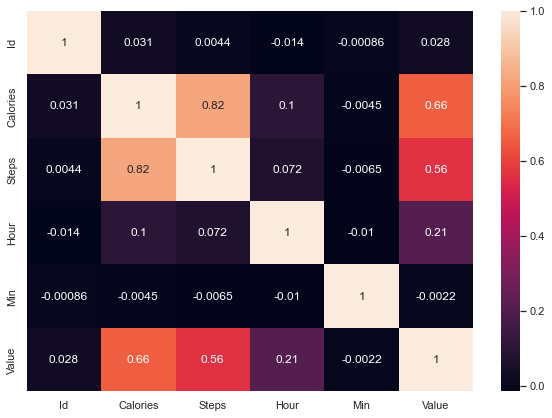

In [230]:
plt.figure(figsize=(10,7))
sns.heatmap(df2.corr(),annot=True)



In [200]:
df4

Calories  Steps      Value
0       0.90400      0  73.000000
1       0.90400      0  75.500000
2       0.99440      0  74.833333
3       0.90400      0  75.000000
4       0.90400      0  73.000000
...         ...    ...        ...
41485   1.17026      0  88.833333
41486   1.17026      0  86.500000
41487   1.17026      0  87.000000
41488   1.08024      0  94.750000
41489   0.99022      0  87.142857

[41490 rows x 3 columns]

### 

In [210]:
df4['Value'].max()

173.1578947368421

In [205]:
###
#Importing the dataset
###
dataset = df4
X = dataset.iloc[:, 1:3].values
y = dataset.iloc[:, 0].values

In [211]:
###
#Splitting training-test set
###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [212]:
###
#Training the Multiple Linear Regression model on the Training set
###
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [213]:
###
#Making the Calorie prediction:
###
y_pred = regressor.predict(X_test)

In [214]:
###
#Comparing prediction with real values:
###
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0.91 0.9 ]
 [1.03 0.98]
 [1.04 0.9 ]
 ...
 [1.09 0.9 ]
 [2.64 3.24]
 [0.84 0.9 ]]


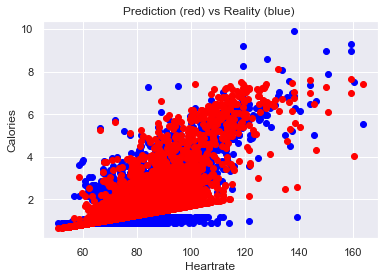

In [220]:
###
#Visualizing prediction Vs Reality on one parameter:
###
plt.scatter(X_test[:,1], y_test, color = 'blue') #X_test[:,3] is one of the variables that I chose to show the Visualization
plt.scatter(X_test[:,1], y_pred, color = 'red')
plt.title('Prediction (red) vs Reality (blue) ')
plt.xlabel('Heartrate')
plt.ylabel('Calories')
plt.show()

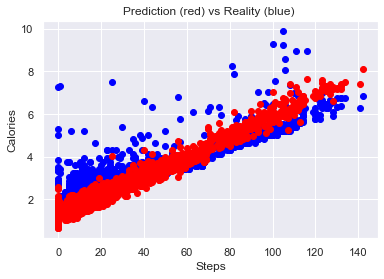

In [219]:
###
#Visualizing prediction Vs Reality on one parameter:
###
plt.scatter(X_test[:,0], y_test, color = 'blue') #X_test[:,3] is one of the variables that I chose to show the Visualization
plt.scatter(X_test[:,0], y_pred, color = 'red')
plt.title('Prediction (red) vs Reality (blue) ')
plt.xlabel('Steps')
plt.ylabel('Calories')
plt.show()

In [223]:
import statsmodels.formula.api as smf

In [226]:

print(regressor.coef_)  #calling an attribute of the object
print(regressor.intercept_)

[0.04 0.02]
-0.4844284689205529
